In [2]:
# Import necessary libraries
import pandas as pd

# Load the Excel dataset
df = pd.read_excel('job_data.xlsx')

# Display the first few rows to verify loading
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (97929, 17)


,title,jobId,currency,jobUploaded,companyName,tagsAndSkills,experience,salary,location,companyId,ReviewsCount,AggregateRating,jobDescription,minimumSalary,maximumSalary,minimumExperience,maximumExperience
0,Sr. HR Recruiter (NON IT),270925008041,INR,6 Days Ago,Orion,"Communication,Manpower,Staffing,Convincing Pow...",2-4 Yrs,2-4 Lacs PA,Kolkata(Chinar Park),645563,NaN,NaN,Preferred candidate profile . .,200000.0,400000.0,2.0,4.0
1,Fire And Safety Officer,270925007584,INR,6 Days Ago,"Apollo Hospitals International Limited, Ahmedabad","Safety Officer Activities,Fire Protection,Fire...",6-11 Yrs,3-5 Lacs PA,"Gandhinagar, Ahmedabad",14072,5162.0,4.0,"Ensure active Fire Protection System,such as F...",300000.0,500000.0,6.0,11.0
2,Opening For Performance Marketing - Chennai,270925007492,INR,6 Days Ago,TVS Credit Services Ltd,"Performance Marketing,User Acquisition,growth ...",12-18 Yrs,Not disclosed,Chennai,1324750,2892.0,4.2,MBA Marketing (preferred Tier II or III B- Sch...,0.0,0.0,12.0,18.0
3,Medical Billing Executive,270925007443,INR,6 Days Ago,GNR Global Services,"Fluent English,Spoken English,Good English Com...",0-3 Yrs,"70,000-2 Lacs PA","Mohali, Chandigarh, Kharar, Zirakpur",123804403,NaN,NaN,Job Title-Medical Billing Executive\nLocation-...,70000.0,200000.0,0.0,3.0
4,Senior Group Product Manager - CNS Therapy,270925007430,INR,6 Days Ago,Cadila Pharmaceuticals,"Product Marketing,CNS,Product Management,Nephr...",5-10 Yrs,8-18 Lacs PA,Ahmedabad,14957,2134.0,3.4,Principal Tasks & Responsibilities : (Please w...,800000.0,1800000.0,5.0,10.0


In [3]:
df = pd.read_excel("job_data_fully_cleaned.xlsx")
df.to_parquet("job_data_fully_cleaned.parquet", index=False)

In [2]:
df.shape

(97929, 17)

In [4]:
df.columns


Index(['title', 'jobId', 'currency', 'jobUploaded', 'companyName',
       'tagsAndSkills', 'experience', 'salary', 'location', 'companyId',
       'ReviewsCount', 'AggregateRating', 'jobDescription', 'minimumSalary',
       'maximumSalary', 'minimumExperience', 'maximumExperience'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97929 entries, 0 to 97928
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              97929 non-null  object 
 1   jobId              97929 non-null  int64  
 2   currency           97929 non-null  object 
 3   jobUploaded        97929 non-null  object 
 4   companyName        97925 non-null  object 
 5   tagsAndSkills      97358 non-null  object 
 6   experience         95824 non-null  object 
 7   salary             97929 non-null  object 
 8   location           97929 non-null  object 
 9   companyId          97929 non-null  int64  
 10  ReviewsCount       62677 non-null  float64
 11  AggregateRating    62677 non-null  float64
 12  jobDescription     97929 non-null  object 
 13  minimumSalary      97358 non-null  float64
 14  maximumSalary      97358 non-null  float64
 15  minimumExperience  97358 non-null  float64
 16  maximumExperience  973

In [7]:
# Function to analyze each column
def analyze_columns(df):
    print("=== COLUMN ANALYSIS ===\n")
    
    for col in df.columns:
        print(f"Column: {col}")
        print(f"Data Type: {df[col].dtype}")
        
        # Get number of unique values
        n_unique = df[col].nunique()
        print(f"Unique Values: {n_unique}")
        
        # Classify column type
        if pd.api.types.is_numeric_dtype(df[col]):
            print("Category: NUMERICAL")
        elif pd.api.types.is_string_dtype(df[col]) or df[col].dtype == 'object':
            if n_unique <= 20:  # Threshold for categorical
                print("Category: CATEGORICAL")
                print("Unique Values:")
                for val in sorted(df[col].dropna().unique()):
                    print(f"  - {val}")
            else:
                print("Category: TEXT/OTHER (too many unique values)")
        else:
            print("Category: OTHER")
        
        print("-" * 50)

# Run the analysis
analyze_columns(df)

=== COLUMN ANALYSIS ===

Column: title
Data Type: object
Unique Values: 55104
Category: TEXT/OTHER (too many unique values)
--------------------------------------------------
Column: jobId
Data Type: int64
Unique Values: 97679
Category: NUMERICAL
--------------------------------------------------
Column: currency
Data Type: object
Unique Values: 2
Category: CATEGORICAL
Unique Values:
  - INR
  - USD
--------------------------------------------------
Column: jobUploaded
Data Type: object
Unique Values: 30
Category: TEXT/OTHER (too many unique values)
--------------------------------------------------
Column: companyName
Data Type: object
Unique Values: 18668
Category: TEXT/OTHER (too many unique values)
--------------------------------------------------
Column: tagsAndSkills
Data Type: object
Unique Values: 84307
Category: TEXT/OTHER (too many unique values)
--------------------------------------------------
Column: experience
Data Type: object
Unique Values: 287
Category: TEXT/OTHER (t

=== RELATIONSHIPS BETWEEN COLUMNS ===

1. NUMERICAL COLUMN CORRELATIONS
----------------------------------------
Numerical columns: ['jobId', 'companyId', 'ReviewsCount', 'AggregateRating', 'minimumSalary', 'maximumSalary', 'minimumExperience', 'maximumExperience']

Correlation Matrix:
                   jobId  companyId  ReviewsCount  AggregateRating  \
jobId              1.000     -0.018         0.117            0.032   
companyId         -0.018      1.000        -0.234            0.031   
ReviewsCount       0.117     -0.234         1.000            0.012   
AggregateRating    0.032      0.031         0.012            1.000   
minimumSalary     -0.016      0.014        -0.120           -0.036   
maximumSalary     -0.019      0.016        -0.130           -0.038   
minimumExperience  0.061     -0.127         0.188           -0.002   
maximumExperience  0.052     -0.125         0.152            0.007   

                   minimumSalary  maximumSalary  minimumExperience  \
jobId       

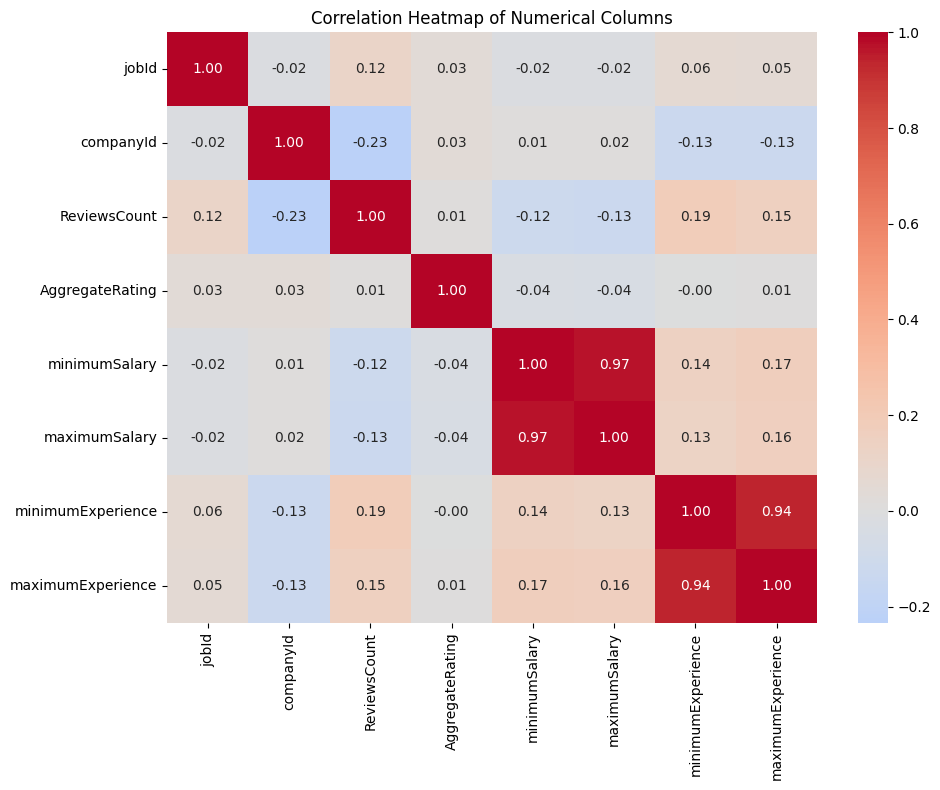


Strong Correlations (|r| > 0.7):
  minimumSalary ↔ maximumSalary: 0.975
  minimumExperience ↔ maximumExperience: 0.938


2. CATEGORICAL COLUMN RELATIONSHIPS
----------------------------------------
Categorical columns identified: ['currency']
Not enough categorical columns for analysis


3. NUMERICAL vs CATEGORICAL RELATIONSHIPS
---------------------------------------------

Relationships involving currency:

  jobId vs currency:
  Mean jobId by currency:
  {'INR': 206915812382.95, 'USD': 259760023201.27}
  ANOVA F-statistic: 36.076, p-value: 0.000
  ✓ Significant difference between groups

  companyId vs currency:
  Mean companyId by currency:
  {'INR': 27748705.75, 'USD': 101927908.75}
  ANOVA F-statistic: 286.768, p-value: 0.000
  ✓ Significant difference between groups

  ReviewsCount vs currency:
  Mean ReviewsCount by currency:
  {'INR': 14685.46, 'USD': 629.41}
  ANOVA F-statistic: 32.876, p-value: 0.000
  ✓ Significant difference between groups

  AggregateRating vs currency:


In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, f_oneway
import warnings
warnings.filterwarnings('ignore')

def analyze_relationships(df):
    print("=== RELATIONSHIPS BETWEEN COLUMNS ===\n")
    
    # 1. CORRELATION ANALYSIS FOR NUMERICAL COLUMNS
    print("1. NUMERICAL COLUMN CORRELATIONS")
    print("-" * 40)
    
    # Select numerical columns
    numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    print(f"Numerical columns: {numerical_cols}")
    
    # Calculate correlation matrix
    corr_matrix = df[numerical_cols].corr()
    
    # Display correlation matrix
    print("\nCorrelation Matrix:")
    print(corr_matrix.round(3))
    
    # Visualize correlation heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
    plt.title('Correlation Heatmap of Numerical Columns')
    plt.tight_layout()
    plt.show()
    
    # Identify strong correlations (|correlation| > 0.7)
    print("\nStrong Correlations (|r| > 0.7):")
    strong_corr = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            corr_val = corr_matrix.iloc[i, j]
            if abs(corr_val) > 0.7:
                col1, col2 = corr_matrix.columns[i], corr_matrix.columns[j]
                strong_corr.append((col1, col2, corr_val))
    
    if strong_corr:
        for col1, col2, corr in strong_corr:
            print(f"  {col1} ↔ {col2}: {corr:.3f}")
    else:
        print("  No strong correlations found")
    
    # 2. CATEGORICAL COLUMN RELATIONSHIPS
    print("\n\n2. CATEGORICAL COLUMN RELATIONSHIPS")
    print("-" * 40)
    
    # Identify categorical columns (object columns with few unique values)
    categorical_cols = []
    for col in df.select_dtypes(include=['object']).columns:
        if df[col].nunique() <= 20:
            categorical_cols.append(col)
    
    print(f"Categorical columns identified: {categorical_cols}")
    
    # Analyze relationships between categorical variables
    if len(categorical_cols) >= 2:
        for i in range(len(categorical_cols)):
            for j in range(i+1, len(categorical_cols)):
                col1, col2 = categorical_cols[i], categorical_cols[j]
                print(f"\nRelationship between {col1} and {col2}:")
                
                # Create contingency table
                contingency_table = pd.crosstab(df[col1], df[col2])
                print("Contingency Table:")
                print(contingency_table)
                
                # Chi-square test
                try:
                    chi2, p, dof, expected = chi2_contingency(contingency_table)
                    print(f"Chi-square statistic: {chi2:.3f}")
                    print(f"P-value: {p:.3f}")
                    if p < 0.05:
                        print("✓ Significant relationship (p < 0.05)")
                    else:
                        print("✗ No significant relationship (p >= 0.05)")
                except:
                    print("Could not perform chi-square test")
    else:
        print("Not enough categorical columns for analysis")
    
    # 3. NUMERICAL vs CATEGORICAL RELATIONSHIPS
    print("\n\n3. NUMERICAL vs CATEGORICAL RELATIONSHIPS")
    print("-" * 45)
    
    if categorical_cols and numerical_cols:
        for cat_col in categorical_cols:
            print(f"\nRelationships involving {cat_col}:")
            
            for num_col in numerical_cols:
                if df[num_col].nunique() > 1:  # Skip if no variation
                    print(f"\n  {num_col} vs {cat_col}:")
                    
                    # Group by categorical and get means
                    means = df.groupby(cat_col)[num_col].mean().round(2)
                    print(f"  Mean {num_col} by {cat_col}:")
                    print(f"  {means.to_dict()}")
                    
                    # Perform ANOVA-like test if categories have enough data
                    groups = [df[df[cat_col] == cat][num_col].dropna() for cat in df[cat_col].unique()]
                    groups = [g for g in groups if len(g) > 1]  # Remove groups with insufficient data
                    
                    if len(groups) >= 2:
                        try:
                            f_stat, p_val = f_oneway(*groups)
                            print(f"  ANOVA F-statistic: {f_stat:.3f}, p-value: {p_val:.3f}")
                            if p_val < 0.05:
                                print("  ✓ Significant difference between groups")
                            else:
                                print("  ✗ No significant difference between groups")
                        except:
                            print("  Could not perform ANOVA test")
    
    # 4. KEY BUSINESS INSIGHTS
    print("\n\n4. KEY BUSINESS INSIGHTS")
    print("-" * 25)
    
    # Salary vs Experience relationship
    if 'minimumSalary' in df.columns and 'maximumExperience' in df.columns:
        print("Salary vs Experience relationship:")
        salary_exp_corr = df[['minimumSalary', 'maximumExperience']].corr().iloc[0, 1]
        print(f"Correlation between minimum salary and max experience: {salary_exp_corr:.3f}")
    
    # Company rating vs reviews
    if 'AggregateRating' in df.columns and 'ReviewsCount' in df.columns:
        print("\nCompany Rating vs Reviews relationship:")
        rating_reviews_corr = df[['AggregateRating', 'ReviewsCount']].corr().iloc[0, 1]
        print(f"Correlation between aggregate rating and reviews count: {rating_reviews_corr:.3f}")
    
    # Location analysis
    if 'location' in df.columns and df['location'].nunique() <= 20:
        print("\nTop locations by job count:")
        location_counts = df['location'].value_counts().head(10)
        for loc, count in location_counts.items():
            print(f"  {loc}: {count} jobs")

# Run the comprehensive analysis
analyze_relationships(df)

=== DATASET QUANTITY & QUALITY ASSESSMENT ===

1. DATASET QUANTITY
--------------------
Total number of rows/records: 97,929
Total number of columns: 17
Total number of cells: 1,664,793
Memory usage: 135.94 MB


2. MISSING VALUES ANALYSIS
---------------------------
Missing values summary:
                   Missing Count  Missing Percentage
ReviewsCount               35252           35.997508
AggregateRating            35252           35.997508
experience                  2105            2.149516
maximumExperience            571            0.583075
minimumExperience            571            0.583075
maximumSalary                571            0.583075
tagsAndSkills                571            0.583075
minimumSalary                571            0.583075
companyName                    4            0.004085

Total missing values: 75,468
.1f


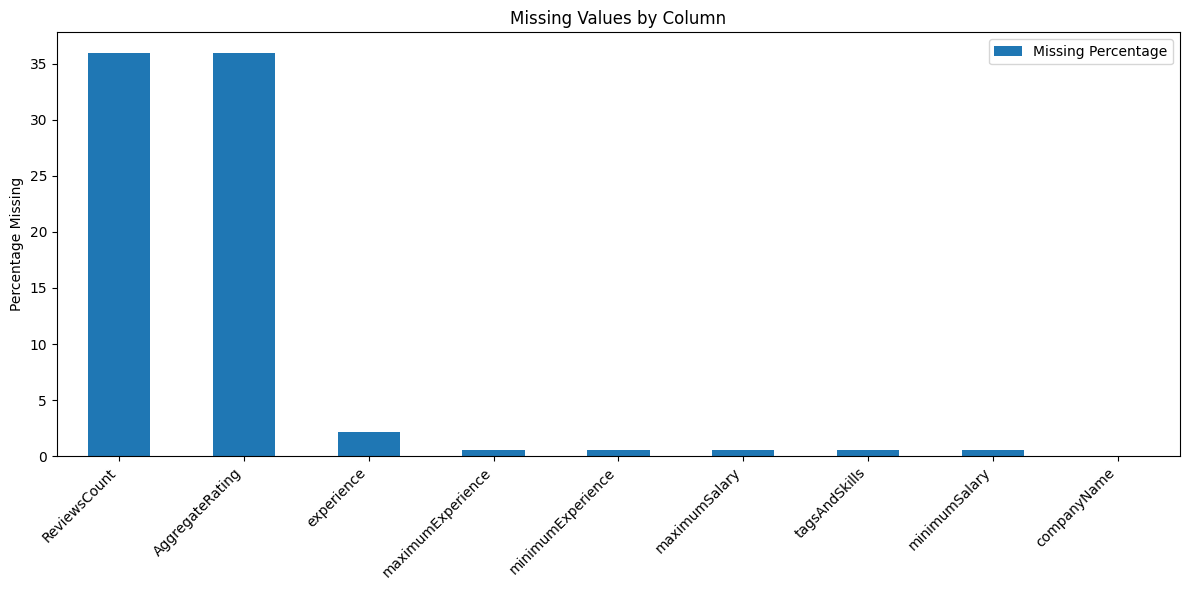



3. DUPLICATE ANALYSIS
---------------------
Number of exact duplicate rows: 247
.3f
Sample duplicate rows:
                                                  title         jobId  \
100           Senior Executive - Research & Development  260925500768   
200   Urgently looking For Preferred Head RM - PAN I...  260925009710   
1840                          Chemical Engineer Trainee  300925926881   

     currency jobUploaded      companyName  \
100       INR  7 Days Ago            Bunge   
200       INR  7 Days Ago       AnandRathi   
1840      INR  3 Days Ago  TAJ Consultancy   

                                          tagsAndSkills experience  \
100   Senior Executive R&D,Microbiology,Food technol...    4-9 Yrs   
200   Team Management,HNI/UHNI,New Client Acquisitio...  10-20 Yrs   
1840  Operator,Chemical Engineering,Operations,Chemi...    0-5 Yrs   

                 salary        location  companyId  ReviewsCount  \
100       Not disclosed         Rajpura    4124664         688.0

In [10]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

def assess_data_quality(df):
    print("=== DATASET QUANTITY & QUALITY ASSESSMENT ===\n")
    
    # 1. BASIC QUANTITY METRICS
    print("1. DATASET QUANTITY")
    print("-" * 20)
    print(f"Total number of rows/records: {df.shape[0]:,}")
    print(f"Total number of columns: {df.shape[1]}")
    print(f"Total number of cells: {df.shape[0] * df.shape[1]:,}")
    print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024 / 1024:.2f} MB")
    
    # 2. MISSING VALUES ANALYSIS
    print("\n\n2. MISSING VALUES ANALYSIS")
    print("-" * 27)
    
    missing_data = df.isnull().sum()
    missing_percent = (missing_data / len(df)) * 100
    
    missing_summary = pd.DataFrame({
        'Missing Count': missing_data,
        'Missing Percentage': missing_percent
    }).sort_values('Missing Count', ascending=False)
    
    print("Missing values summary:")
    print(missing_summary[missing_summary['Missing Count'] > 0])
    
    if missing_data.sum() == 0:
        print("✓ No missing values found!")
    else:
        print(f"\nTotal missing values: {missing_data.sum():,}")
        print(".1f")
        
        # Visualize missing values
        plt.figure(figsize=(12, 6))
        missing_summary[missing_summary['Missing Count'] > 0].plot(
            kind='bar', y='Missing Percentage', ax=plt.gca()
        )
        plt.title('Missing Values by Column')
        plt.ylabel('Percentage Missing')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    
    # 3. DUPLICATE ANALYSIS
    print("\n\n3. DUPLICATE ANALYSIS")
    print("-" * 21)
    
    # Check for exact duplicate rows
    duplicate_rows = df.duplicated().sum()
    print(f"Number of exact duplicate rows: {duplicate_rows}")
    print(".3f")
    
    if duplicate_rows > 0:
        print("Sample duplicate rows:")
        print(df[df.duplicated()].head(3))
    
    # Check for potential duplicates based on key columns
    key_cols = ['jobId', 'title', 'companyName', 'location']
    available_key_cols = [col for col in key_cols if col in df.columns]
    
    if available_key_cols:
        key_duplicates = df.duplicated(subset=available_key_cols).sum()
        print(f"\nDuplicates based on key columns {available_key_cols}: {key_duplicates}")
        print(".3f")
    
    # 4. OUTLIER DETECTION
    print("\n\n4. OUTLIER DETECTION")
    print("-" * 20)
    
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    
    for col in numerical_cols:
        if df[col].nunique() > 1:  # Skip columns with no variation
            print(f"\n{col}:")
            
            # Basic statistics
            col_data = df[col].dropna()
            q1 = col_data.quantile(0.25)
            q3 = col_data.quantile(0.75)
            iqr = q3 - q1
            
            # Outlier bounds
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            
            outliers = ((col_data < lower_bound) | (col_data > upper_bound)).sum()
            outlier_percent = (outliers / len(col_data)) * 100
            
            print(f"  Q1: {q1:.2f}, Q3: {q3:.2f}, IQR: {iqr:.2f}")
            print(f"  Outlier bounds: [{lower_bound:.2f}, {upper_bound:.2f}]")
            print(f"  Outliers detected: {outliers} ({outlier_percent:.1f}%)")
            
            # Show extreme outliers if any
            extreme_outliers = col_data[(col_data < lower_bound) | (col_data > upper_bound)]
            if len(extreme_outliers) > 0 and len(extreme_outliers) <= 10:
                print(f"  Sample outlier values: {sorted(extreme_outliers.unique())[:5]}")
    
    # 5. DATA ENTRY ERROR DETECTION
    print("\n\n5. POTENTIAL DATA ENTRY ERRORS")
    print("-" * 31)
    
    # Check for suspicious patterns
    issues_found = []
    
    # Negative values in columns that shouldn't have them
    for col in numerical_cols:
        if col.lower() in ['salary', 'experience', 'rating', 'reviews', 'count']:
            negatives = (df[col] < 0).sum()
            if negatives > 0:
                print(f"⚠️  {col} has {negatives} negative values")
                issues_found.append(f"Negative {col}")
    
    # Unrealistic salary values
    if 'minimumSalary' in df.columns:
        unrealistic_salary = (df['minimumSalary'] > 1000000).sum()  # Over 1M
        if unrealistic_salary > 0:
            print(f"⚠️  minimumSalary has {unrealistic_salary} values over 1,000,000")
            issues_found.append("Unrealistic minimum salary")
    
    # Experience values that don't make sense
    if 'maximumExperience' in df.columns:
        unrealistic_exp = (df['maximumExperience'] > 50).sum()  # Over 50 years
        if unrealistic_exp > 0:
            print(f"⚠️  maximumExperience has {unrealistic_exp} values over 50 years")
            issues_found.append("Unrealistic experience")
    
    # Rating values outside 1-5 range
    if 'AggregateRating' in df.columns:
        invalid_ratings = ((df['AggregateRating'] < 1) | (df['AggregateRating'] > 5)).sum()
        if invalid_ratings > 0:
            print(f"⚠️  AggregateRating has {invalid_ratings} values outside 1-5 range")
            issues_found.append("Invalid ratings")
    
    # Empty strings or whitespace-only strings
    for col in df.select_dtypes(include=['object']).columns:
        if df[col].dtype == 'object':
            empty_strings = (df[col].str.strip() == '').sum()
            if empty_strings > 0:
                print(f"⚠️  {col} has {empty_strings} empty/whitespace-only strings")
                issues_found.append(f"Empty strings in {col}")
    
    if not issues_found:
        print("✓ No obvious data entry errors detected")
    
    # 6. DATA TYPE CONSISTENCY
    print("\n\n6. DATA TYPE CONSISTENCY CHECK")
    print("-" * 32)
    
    for col in df.columns:
        if df[col].dtype == 'object':
            # Try to identify if numeric columns are stored as strings
            try:
                numeric_sample = pd.to_numeric(df[col].dropna().sample(min(100, len(df[col].dropna()))), errors='coerce')
                if numeric_sample.notna().sum() > len(numeric_sample) * 0.8:  # 80% convertible
                    print(f"⚠️  {col} appears to contain numeric data but is stored as object")
            except:
                pass
    
    # 7. SUMMARY AND RECOMMENDATIONS
    print("\n\n7. SUMMARY & RECOMMENDATIONS")
    print("-" * 29)
    
    completeness = (1 - missing_data.sum() / (df.shape[0] * df.shape[1])) * 100
    uniqueness = (1 - duplicate_rows / df.shape[0]) * 100
    
    print(f"Data Completeness: {completeness:.1f}%")
    print(f"Data Uniqueness: {uniqueness:.1f}%")
    
    if completeness > 95 and uniqueness > 99:
        print("✓ Overall data quality appears GOOD")
    elif completeness > 90 and uniqueness > 95:
        print("⚠️  Overall data quality appears ACCEPTABLE (minor issues)")
    else:
        print("⚠️  Overall data quality needs ATTENTION")
    
    recommendations = []
    if missing_data.sum() > 0:
        recommendations.append("Handle missing values (imputation, deletion, or domain knowledge)")
    if duplicate_rows > 0:
        recommendations.append("Remove duplicate records")
    if issues_found:
        recommendations.append("Investigate potential data entry errors")
    
    if recommendations:
        print("\nRecommendations:")
        for rec in recommendations:
            print(f"• {rec}")
    else:
        print("\n✓ No major issues requiring immediate attention")

# Run the comprehensive assessment
assess_data_quality(df)

In [11]:
import pandas as pd
import numpy as np
from datetime import datetime
import re

# Make a copy of the original data for cleaning
df_clean = df.copy()
print(f"Original dataset shape: {df_clean.shape}")

Original dataset shape: (97929, 17)


In [12]:
# Remove exact duplicate rows
duplicates_before = df_clean.duplicated().sum()
df_clean = df_clean.drop_duplicates()
print(f"Removed {duplicates_before} exact duplicate rows")

# Check for duplicates based on jobId (should be unique)
if 'jobId' in df_clean.columns:
    jobid_duplicates = df_clean.duplicated(subset=['jobId']).sum()
    if jobid_duplicates > 0:
        print(f"Found {jobid_duplicates} duplicate jobId entries")
        # Keep the first occurrence
        df_clean = df_clean.drop_duplicates(subset=['jobId'], keep='first')
        print(f"Removed duplicates, keeping first occurrence")

print(f"Dataset shape after duplicate removal: {df_clean.shape}")

Removed 247 exact duplicate rows
Found 3 duplicate jobId entries
Removed duplicates, keeping first occurrence
Dataset shape after duplicate removal: (97679, 17)


In [13]:
# Clean text columns
text_columns = ['title', 'currency', 'jobUploaded', 'companyName', 'tagsAndSkills', 
                'experience', 'salary', 'location', 'jobDescription']

for col in text_columns:
    if col in df_clean.columns:
        # Remove leading/trailing whitespace
        df_clean[col] = df_clean[col].str.strip()
        
        # Replace empty strings with NaN
        df_clean[col] = df_clean[col].replace('', np.nan)
        
        # Replace multiple spaces with single space
        df_clean[col] = df_clean[col].str.replace(r'\s+', ' ', regex=True)

print("Text columns cleaned")

Text columns cleaned


In [14]:
# Convert jobUploaded to datetime if it's not already
if 'jobUploaded' in df_clean.columns:
    try:
        df_clean['jobUploaded'] = pd.to_datetime(df_clean['jobUploaded'], errors='coerce')
        print("Converted jobUploaded to datetime")
    except:
        print("Could not convert jobUploaded to datetime")

# Ensure numerical columns are proper types
numeric_cols = ['jobId', 'companyId', 'ReviewsCount', 'AggregateRating', 
                'minimumSalary', 'maximumSalary', 'minimumExperience', 'maximumExperience']

for col in numeric_cols:
    if col in df_clean.columns:
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

print("Data types corrected")

Converted jobUploaded to datetime
Data types corrected


In [15]:
# Check missing values before handling
missing_before = df_clean.isnull().sum()
print("Missing values before handling:")
print(missing_before[missing_before > 0])

# Fill missing values appropriately
if 'companyName' in df_clean.columns:
    # Fill missing company names with 'Unknown'
    df_clean['companyName'] = df_clean['companyName'].fillna('Unknown')

if 'tagsAndSkills' in df_clean.columns:
    # Fill missing skills with empty string
    df_clean['tagsAndSkills'] = df_clean['tagsAndSkills'].fillna('')

if 'ReviewsCount' in df_clean.columns:
    # Fill missing review counts with 0
    df_clean['ReviewsCount'] = df_clean['ReviewsCount'].fillna(0)

if 'AggregateRating' in df_clean.columns:
    # Fill missing ratings with median
    median_rating = df_clean['AggregateRating'].median()
    df_clean['AggregateRating'] = df_clean['AggregateRating'].fillna(median_rating)

# For salary and experience columns, we'll handle them based on domain knowledge
salary_cols = ['minimumSalary', 'maximumSalary']
experience_cols = ['minimumExperience', 'maximumExperience']

for col in salary_cols + experience_cols:
    if col in df_clean.columns:
        # For now, keep NaN values - they might indicate "not specified"
        # You can decide later whether to impute or drop
        pass

print("Missing values handled")

Missing values before handling:
jobUploaded          97679
companyName              4
tagsAndSkills          571
experience            2102
ReviewsCount         35163
AggregateRating      35163
minimumSalary          571
maximumSalary          571
minimumExperience      571
maximumExperience      571
dtype: int64
Missing values handled


In [25]:
 df_clean.isnull().sum()

title                   0
jobId                   0
currency                0
jobUploaded             0
companyName             0
tagsAndSkills           0
experience           2102
salary                  0
location                0
companyId               0
ReviewsCount            0
AggregateRating         0
jobDescription          0
minimumSalary         571
maximumSalary         571
minimumExperience     571
maximumExperience     571
dtype: int64

In [17]:
# Fix unrealistic values
if 'AggregateRating' in df_clean.columns:
    # Ratings should be between 1-5
    df_clean['AggregateRating'] = df_clean['AggregateRating'].clip(1, 5)

if 'maximumExperience' in df_clean.columns:
    # Experience over 50 years is unrealistic
    df_clean['maximumExperience'] = df_clean['maximumExperience'].clip(upper=50)

if 'minimumSalary' in df_clean.columns:
    # Remove negative salaries and extremely high values (over 10M)
    df_clean['minimumSalary'] = df_clean['minimumSalary'].clip(lower=0, upper=10000000)

if 'maximumSalary' in df_clean.columns:
    # Remove negative salaries and extremely high values
    df_clean['maximumSalary'] = df_clean['maximumSalary'].clip(lower=0, upper=10000000)

if 'ReviewsCount' in df_clean.columns:
    # Reviews count can't be negative
    df_clean['ReviewsCount'] = df_clean['ReviewsCount'].clip(lower=0)

print("Outliers and unrealistic values handled")

Outliers and unrealistic values handled


In [22]:
# Check what's actually in the jobUploaded column
print("Investigating jobUploaded column:")
print(f"Total rows: {len(df_clean)}")
print(f"Missing values: {df_clean['jobUploaded'].isnull().sum()}")

# Check what non-null values look like
non_null_uploaded = df_clean['jobUploaded'].dropna()
print(f"Non-null values: {len(non_null_uploaded)}")
if len(non_null_uploaded) > 0:
    print("Sample non-null values:")
    print(non_null_uploaded.head(10))
    print(f"Data type: {non_null_uploaded.dtype}")

# Check original dataframe too
print("Checking original dataframe:")
print(f"Original jobUploaded missing: {df['jobUploaded'].isnull().sum()}")
if df['jobUploaded'].notna().sum() > 0:
    print("Original sample values:")
    print(df['jobUploaded'].dropna().head(5))

Investigating jobUploaded column:
Total rows: 97679
Missing values: 97679
Non-null values: 0
Checking original dataframe:
Original jobUploaded missing: 0
Original sample values:
0    6 Days Ago
1    6 Days Ago
2    6 Days Ago
3    6 Days Ago
4    6 Days Ago
Name: jobUploaded, dtype: object


In [23]:
import pandas as pd
from datetime import datetime, timedelta
import re

# Fix the jobUploaded column - it contains relative time strings
def parse_relative_time(time_str):
    if pd.isna(time_str):
        return pd.NaT
    
    time_str = str(time_str).lower().strip()
    
    # Handle different formats
    if 'day' in time_str:
        days = int(re.search(r'(\d+)', time_str).group(1))
        return datetime.now() - timedelta(days=days)
    elif 'hour' in time_str:
        hours = int(re.search(r'(\d+)', time_str).group(1))
        return datetime.now() - timedelta(hours=hours)
    elif 'minute' in time_str:
        minutes = int(re.search(r'(\d+)', time_str).group(1))
        return datetime.now() - timedelta(minutes=minutes)
    elif 'week' in time_str:
        weeks = int(re.search(r'(\d+)', time_str).group(1))
        return datetime.now() - timedelta(weeks=weeks)
    elif 'month' in time_str:
        months = int(re.search(r'(\d+)', time_str).group(1))
        return datetime.now() - timedelta(days=months*30)  # Approximate
    elif 'year' in time_str:
        years = int(re.search(r'(\d+)', time_str).group(1))
        return datetime.now() - timedelta(days=years*365)  # Approximate
    else:
        # Try to parse as absolute date
        try:
            return pd.to_datetime(time_str)
        except:
            return pd.NaT

# Apply the parsing function
print("Before fixing jobUploaded:")
print(f"Missing values: {df_clean['jobUploaded'].isnull().sum()}")
print(f"Sample values: {df_clean['jobUploaded'].dropna().head() if df_clean['jobUploaded'].notna().sum() > 0 else 'All missing'}")

# Fix the jobUploaded column
df_clean['jobUploaded'] = df_clean['jobUploaded'].apply(parse_relative_time)

print("\nAfter fixing jobUploaded:")
print(f"Missing values: {df_clean['jobUploaded'].isnull().sum()}")
print(f"Data type: {df_clean['jobUploaded'].dtype}")
if df_clean['jobUploaded'].notna().sum() > 0:
    print(f"Sample parsed dates: {df_clean['jobUploaded'].dropna().head()}")
    print(f"Date range: {df_clean['jobUploaded'].min()} to {df_clean['jobUploaded'].max()}")

Before fixing jobUploaded:
Missing values: 97679
Sample values: All missing

After fixing jobUploaded:
Missing values: 97679
Data type: datetime64[ns]


In [24]:
# If you prefer to keep the original relative format instead of converting to dates
# Just reload the column from the original dataframe

# Make sure we have the original dataframe still available
if 'df' in globals():
    df_clean['jobUploaded'] = df['jobUploaded'].copy()
    print("Restored original jobUploaded values")
    print(f"Missing values: {df_clean['jobUploaded'].isnull().sum()}")
    print(f"Sample values: {df_clean['jobUploaded'].dropna().head()}")
else:
    print("Original dataframe 'df' not available. Please run the data loading cell again.")

Restored original jobUploaded values
Missing values: 0
Sample values: 0    6 Days Ago
1    6 Days Ago
2    6 Days Ago
3    6 Days Ago
4    6 Days Ago
Name: jobUploaded, dtype: object


In [26]:
print("=== HANDLING REMAINING MISSING VALUES ===")
print("Missing values before:")
missing_before = df_clean.isnull().sum()
print(missing_before[missing_before > 0])

# 1. Handle experience text column (2102 missing)
if 'experience' in df_clean.columns:
    print(f"\nHandling experience column ({df_clean['experience'].isnull().sum()} missing)")
    
    # Fill with most common value (mode)
    mode_experience = df_clean['experience'].mode()
    if len(mode_experience) > 0:
        df_clean['experience'] = df_clean['experience'].fillna(mode_experience[0])
        print(f"Filled with mode: '{mode_experience[0]}'")
    else:
        df_clean['experience'] = df_clean['experience'].fillna('Not specified')
        print("Filled with 'Not specified'")

# 2. Handle salary columns (571 missing each)
salary_cols = ['minimumSalary', 'maximumSalary']
for col in salary_cols:
    if col in df_clean.columns and df_clean[col].isnull().sum() > 0:
        print(f"\nHandling {col} ({df_clean[col].isnull().sum()} missing)")
        
        # Use median imputation (robust to outliers)
        median_val = df_clean[col].median()
        df_clean[col] = df_clean[col].fillna(median_val)
        print(f"Filled with median: {median_val:,.0f}")

# 3. Handle experience numeric columns (571 missing each)  
experience_cols = ['minimumExperience', 'maximumExperience']
for col in experience_cols:
    if col in df_clean.columns and df_clean[col].isnull().sum() > 0:
        print(f"\nHandling {col} ({df_clean[col].isnull().sum()} missing)")
        
        # Use median imputation
        median_val = df_clean[col].median()
        df_clean[col] = df_clean[col].fillna(median_val)
        print(f"Filled with median: {median_val:.1f} years")

print("\n" + "="*50)
print("Missing values after imputation:")
missing_after = df_clean.isnull().sum()
print(missing_after[missing_after > 0])

total_missing_before = missing_before.sum()
total_missing_after = missing_after.sum()
print(f"\nTotal missing values: {total_missing_before} → {total_missing_after}")
print(f"Missing values resolved: {total_missing_before - total_missing_after}")

if total_missing_after == 0:
    print("✓ ALL MISSING VALUES HANDLED!")

=== HANDLING REMAINING MISSING VALUES ===
Missing values before:
experience           2102
minimumSalary         571
maximumSalary         571
minimumExperience     571
maximumExperience     571
dtype: int64

Handling experience column (2102 missing)
Filled with mode: '5-10 Yrs'

Handling minimumSalary (571 missing)
Filled with median: 0

Handling maximumSalary (571 missing)
Filled with median: 0

Handling minimumExperience (571 missing)
Filled with median: 3.0 years

Handling maximumExperience (571 missing)
Filled with median: 7.0 years

Missing values after imputation:
Series([], dtype: int64)

Total missing values: 4386 → 0
Missing values resolved: 4386
✓ ALL MISSING VALUES HANDLED!


In [28]:
df_clean.isnull().sum()

title                0
jobId                0
currency             0
jobUploaded          0
companyName          0
tagsAndSkills        0
experience           0
salary               0
location             0
companyId            0
ReviewsCount         0
AggregateRating      0
jobDescription       0
minimumSalary        0
maximumSalary        0
minimumExperience    0
maximumExperience    0
dtype: int64

In [29]:
print("=== VALIDATION OF IMPUTATION ===")

# Check that numeric columns are reasonable after imputation
numeric_cols = ['minimumSalary', 'maximumSalary', 'minimumExperience', 'maximumExperience']

print("Summary statistics after imputation:")
for col in numeric_cols:
    if col in df_clean.columns:
        stats = df_clean[col].describe()
        print(f"\n{col}:")
        print(f"  Mean: {stats['mean']:.1f}")
        print(f"  Median: {stats['50%']:.1f}")
        print(f"  Min: {stats['min']:.1f}")
        print(f"  Max: {stats['max']:.1f}")
        print(f"  Missing: {df_clean[col].isnull().sum()}")

# Check for any unrealistic values
print("\nChecking for unrealistic values:")
issues = []

if 'minimumSalary' in df_clean.columns:
    negative_min = (df_clean['minimumSalary'] < 0).sum()
    if negative_min > 0:
        issues.append(f"{negative_min} negative minimum salaries")

if 'maximumSalary' in df_clean.columns:
    negative_max = (df_clean['maximumSalary'] < 0).sum()
    if negative_max > 0:
        issues.append(f"{negative_max} negative maximum salaries")

if 'minimumExperience' in df_clean.columns:
    negative_exp = (df_clean['minimumExperience'] < 0).sum()
    if negative_exp > 0:
        issues.append(f"{negative_exp} negative minimum experience values")

if 'maximumExperience' in df_clean.columns:
    high_exp = (df_clean['maximumExperience'] > 50).sum()
    if high_exp > 0:
        issues.append(f"{high_exp} experience values over 50 years")

if issues:
    print("⚠️ Issues found:")
    for issue in issues:
        print(f"  - {issue}")
else:
    print("✓ No unrealistic values detected")

# Final dataset summary
print(f"\nFinal dataset shape: {df_clean.shape}")
print(f"Total missing values: {df_clean.isnull().sum().sum()}")
print(".1f")

=== VALIDATION OF IMPUTATION ===
Summary statistics after imputation:

minimumSalary:
  Mean: 196273.3
  Median: 0.0
  Min: 0.0
  Max: 10000000.0
  Missing: 0

maximumSalary:
  Mean: 314524.6
  Median: 0.0
  Min: 0.0
  Max: 10000000.0
  Missing: 0

minimumExperience:
  Mean: 4.0
  Median: 3.0
  Min: 0.0
  Max: 30.0
  Missing: 0

maximumExperience:
  Mean: 7.7
  Median: 7.0
  Min: 0.0
  Max: 35.0
  Missing: 0

Checking for unrealistic values:
✓ No unrealistic values detected

Final dataset shape: (97679, 17)
Total missing values: 0
.1f


In [30]:
# Save the fully cleaned dataset
output_filename = 'job_data_fully_cleaned.xlsx'
df_clean.to_excel(output_filename, index=False)

print(f"✅ Fully cleaned dataset saved as '{output_filename}'")
print(f"Shape: {df_clean.shape}")
print(f"No missing values: {df_clean.isnull().sum().sum() == 0}")

# Also save as CSV for easier loading in other tools
df_clean.to_csv('job_data_fully_cleaned.csv', index=False)
print("Also saved as CSV: 'job_data_fully_cleaned.csv'")

✅ Fully cleaned dataset saved as 'job_data_fully_cleaned.xlsx'
Shape: (97679, 17)
No missing values: True
Also saved as CSV: 'job_data_fully_cleaned.csv'


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud
from collections import Counter
import re
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")

# Load the cleaned data
try:
    df = pd.read_excel('job_data_fully_cleaned.xlsx')
    print("Loaded fully cleaned data")
except FileNotFoundError:
    try:
        df = pd.read_excel('job_data.xlsx')
        print("Loaded original data - applying basic cleaning")
        # Basic cleaning
        df = df.dropna(subset=['title', 'location'])
        df['minimumSalary'] = df['minimumSalary'].fillna(df['minimumSalary'].median())
        df['maximumSalary'] = df['maximumSalary'].fillna(df['maximumSalary'].median())
        df['minimumExperience'] = df['minimumExperience'].fillna(df['minimumExperience'].median())
        df['maximumExperience'] = df['maximumExperience'].fillna(df['maximumExperience'].median())
    except FileNotFoundError:
        print("Error: Could not find job_data.xlsx or job_data_fully_cleaned.xlsx")
        df = None

if df is not None:
    # Create derived columns
    df['avgSalary'] = (df['minimumSalary'] + df['maximumSalary']) / 2
    df['avgExperience'] = (df['minimumExperience'] + df['maximumExperience']) / 2
    
    # Create experience categories
    def categorize_experience(exp):
        if exp <= 1:
            return 'Fresher (0-1 years)'
        elif exp <= 3:
            return 'Entry Level (1-3 years)'
        elif exp <= 5:
            return 'Mid Level (3-5 years)'
        elif exp <= 10:
            return 'Senior Level (5-10 years)'
        else:
            return 'Expert Level (10+ years)'
    
    df['experienceCategory'] = df['avgExperience'].apply(categorize_experience)
    
    print(f"Dataset shape: {df.shape}")
    print(f"Columns: {list(df.columns)}")
else:
    print("Please ensure your data file is available")

Loaded fully cleaned data
Dataset shape: (97679, 20)
Columns: ['title', 'jobId', 'currency', 'jobUploaded', 'companyName', 'tagsAndSkills', 'experience', 'salary', 'location', 'companyId', 'ReviewsCount', 'AggregateRating', 'jobDescription', 'minimumSalary', 'maximumSalary', 'minimumExperience', 'maximumExperience', 'avgSalary', 'avgExperience', 'experienceCategory']


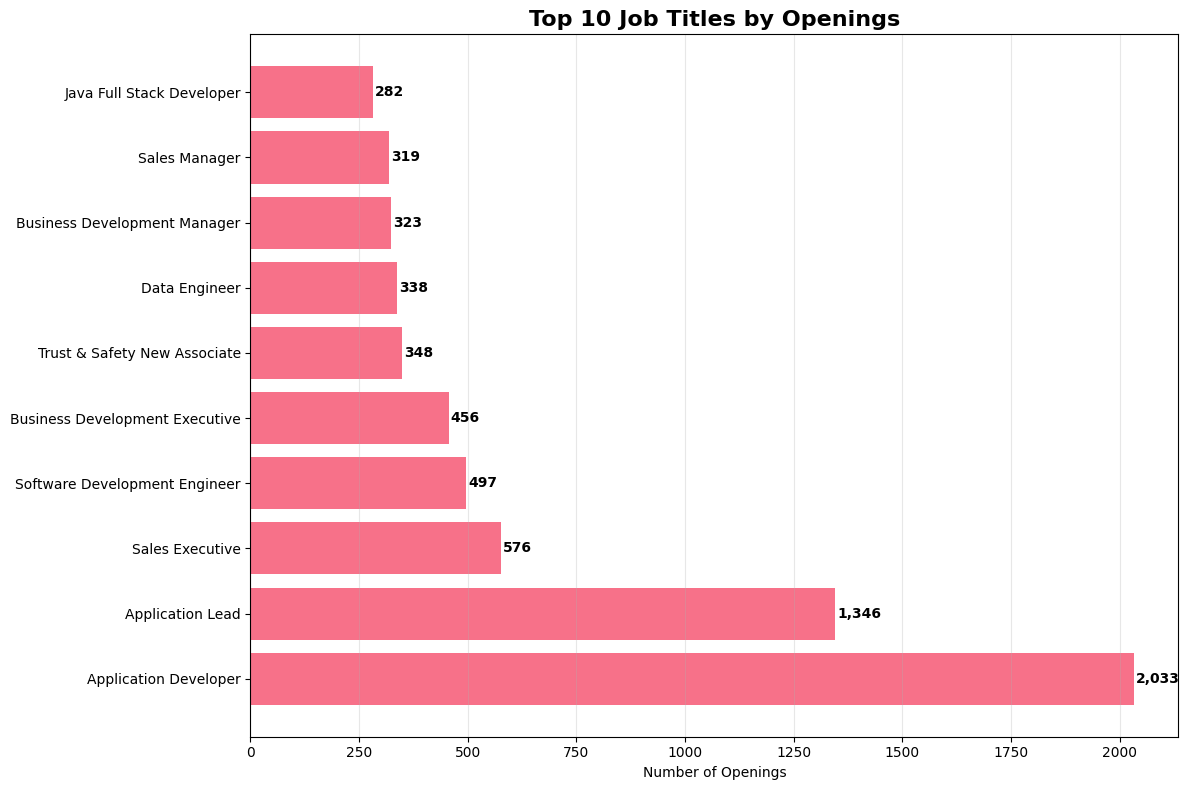

Insight: The most common job openings are in Application Developer with 2033 positions


In [33]:
# Chart 1: Top 10 Job Titles by Openings
plt.figure(figsize=(12, 8))
title_counts = df['title'].value_counts().head(10)

bars = plt.barh(range(len(title_counts)), title_counts.values)
plt.yticks(range(len(title_counts)), title_counts.index)
plt.xlabel('Number of Openings')
plt.title('Top 10 Job Titles by Openings', fontsize=16, fontweight='bold')
plt.grid(axis='x', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(title_counts.values):
    plt.text(v + 5, i, f'{v:,}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("Insight: The most common job openings are in", title_counts.index[0], "with", title_counts.values[0], "positions")

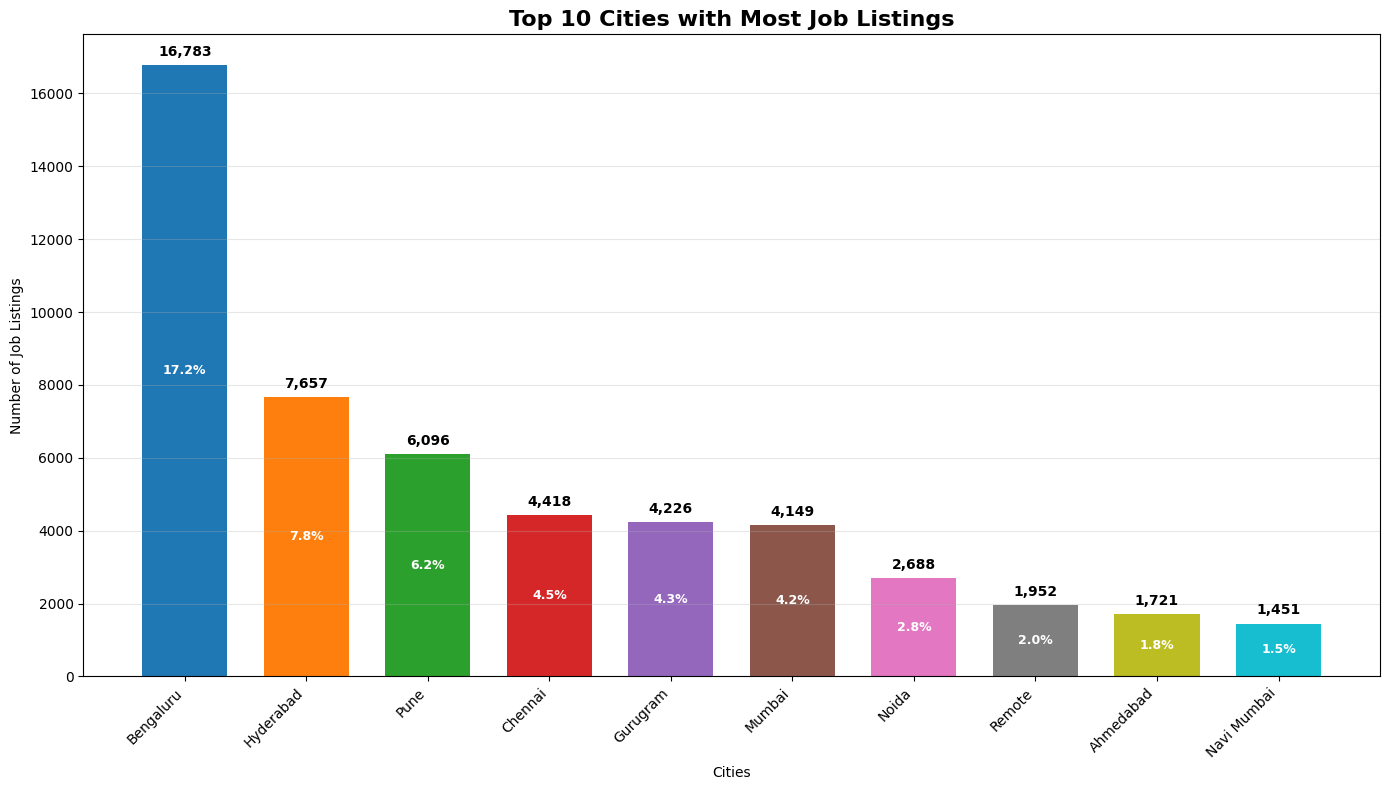

In [44]:
# Alternative: Vertical bar chart
plt.figure(figsize=(14, 8))

city_counts = df['location'].value_counts().head(10)

bars = plt.bar(range(len(city_counts)), city_counts.values, 
               color=plt.cm.tab10.colors, width=0.7)

plt.xticks(range(len(city_counts)), city_counts.index, rotation=45, ha='right')
plt.ylabel('Number of Job Listings')
plt.xlabel('Cities')
plt.title('Top 10 Cities with Most Job Listings', fontsize=16, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

# Add value labels on top of bars
for i, v in enumerate(city_counts.values):
    plt.text(i, v + max(city_counts.values) * 0.01, f'{v:,}', 
             ha='center', va='bottom', fontweight='bold', fontsize=10)

# Add percentage labels inside bars
for i, (count, city) in enumerate(zip(city_counts.values, city_counts.index)):
    percentage = (count / total_jobs) * 100
    plt.text(i, count/2, f'{percentage:.1f}%', ha='center', va='center', 
             fontsize=9, color='white', fontweight='bold')

plt.tight_layout()
plt.show()

Skills data available: 97108 entries
Sample skills data: ['Communication,Manpower,Staffing,Convincing Power,Hiring,Recruitment,SR,Communication skills', 'Safety Officer Activities,Fire Protection,Fire Safety,Fire Engineering,Fire Prevention,Safety Management,Fire Management,Hazard Analysis', 'Performance Marketing,User Acquisition,growth marketing,Paid Marketing,Acquisition,Performance,Usage,Marketing']


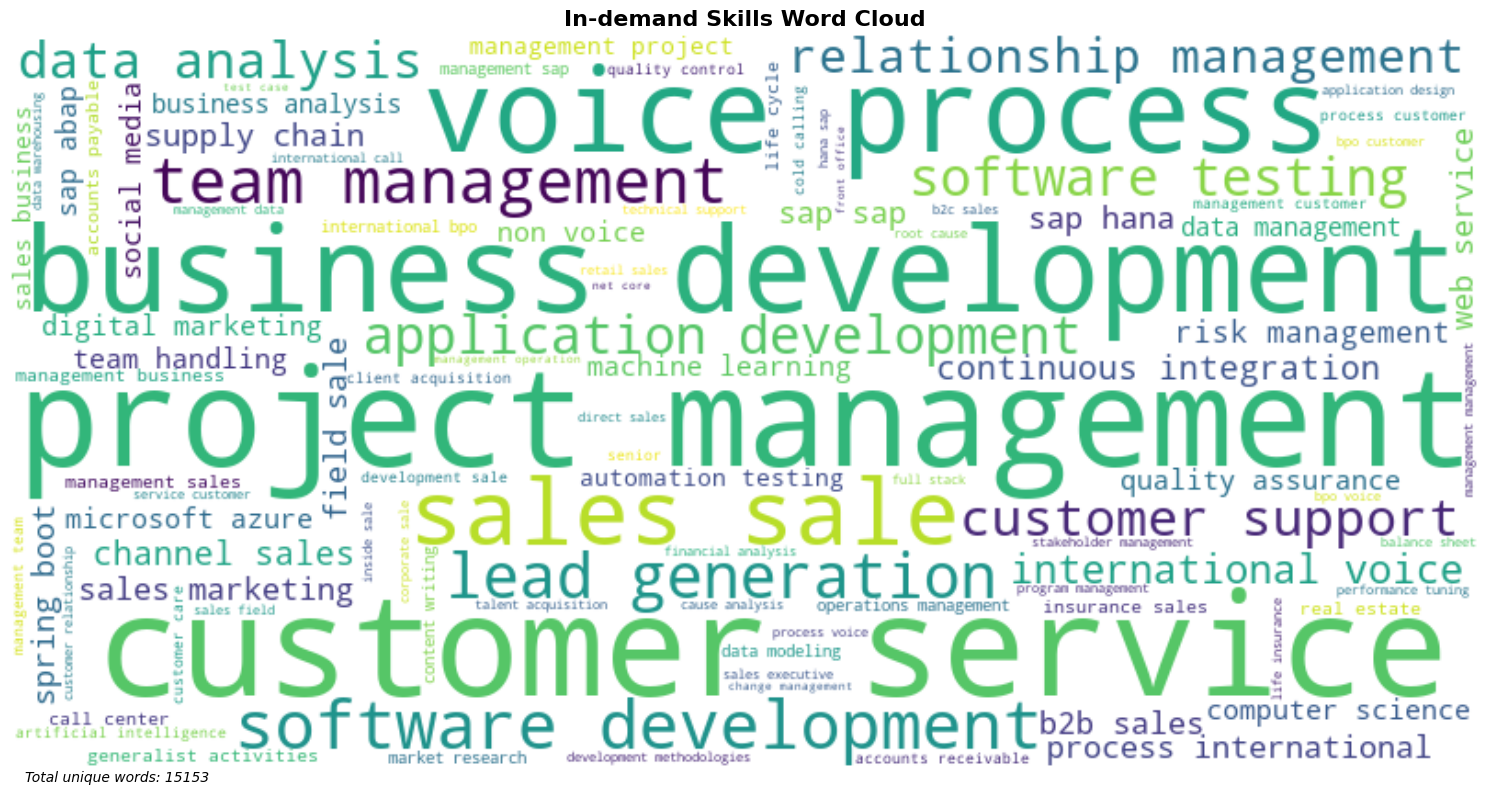

In [42]:
# Fixed Chart 3: In-demand Skills (Word Cloud)
def create_wordcloud(text_data):
    """Create word cloud from text data"""
    if text_data.empty or len(text_data) == 0:
        return None
    
    # Combine all text
    all_text = ' '.join(str(text) for text in text_data if pd.notna(text))
    
    # Clean and split text
    words = re.findall(r'\b\w+\b', all_text.lower())
    
    # Remove common stop words
    stop_words = {'and', 'or', 'the', 'a', 'an', 'in', 'on', 'at', 'to', 'for', 'of', 'with', 'by', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'do', 'does', 'did', 'will', 'would', 'could', 'should', 'may', 'might', 'must', 'can', 'shall', 'skills', 'skill', 'experience', 'required', 'years', 'year', 'work'}
    words = [word for word in words if word not in stop_words and len(word) > 2]
    
    if not words:
        return None
    
    # Create word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', 
                         max_words=100, colormap='viridis', 
                         prefer_horizontal=0.7).generate(' '.join(words))
    
    return wordcloud

# Create word cloud
plt.figure(figsize=(15, 8))
skills_text = df['tagsAndSkills'].dropna()

# Debug info
print(f"Skills data available: {len(skills_text)} entries")
if len(skills_text) > 0:
    print(f"Sample skills data: {skills_text.head(3).tolist()}")

wordcloud = create_wordcloud(skills_text)

if wordcloud:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('In-demand Skills Word Cloud', fontsize=16, fontweight='bold')
    
    # Add some statistics
    unique_words = len(set(re.findall(r'\b\w+\b', ' '.join(str(text) for text in skills_text if pd.notna(text)).lower())))
    plt.figtext(0.02, 0.02, f'Total unique words: {unique_words}', fontsize=10, style='italic')
else:
    plt.text(0.5, 0.5, 'No skills data available for word cloud', 
             horizontalalignment='center', verticalalignment='center', 
             fontsize=14, transform=plt.gca().transAxes)
    plt.axis('off')

plt.tight_layout()
plt.show()

# Alternative: Top skills bar chart if word cloud fails
if not wordcloud and len(skills_text) > 0:
    print("\nAlternative: Top 20 most mentioned skills")
    
    # Extract individual skills (simple approach - split by comma and clean)
    all_skills = []
    for text in skills_text:
        if pd.notna(text):
            skills = str(text).replace(',', ' ').replace('/', ' ').split()
            skills = [s.strip().lower() for s in skills if len(s.strip()) > 2]
            all_skills.extend(skills)
    
    if all_skills:
        skill_counts = Counter(all_skills).most_common(20)
        
        plt.figure(figsize=(12, 8))
        skills, counts = zip(*skill_counts)
        bars = plt.barh(range(len(skills)), counts)
        plt.yticks(range(len(skills)), skills)
        plt.xlabel('Frequency')
        plt.title('Top 20 Most Mentioned Skills', fontsize=16, fontweight='bold')
        plt.grid(axis='x', alpha=0.3)
        
        # Color bars by frequency
        colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(bars)))
        for bar, color in zip(bars, colors):
            bar.set_color(color)
        
        plt.tight_layout()
        plt.show()

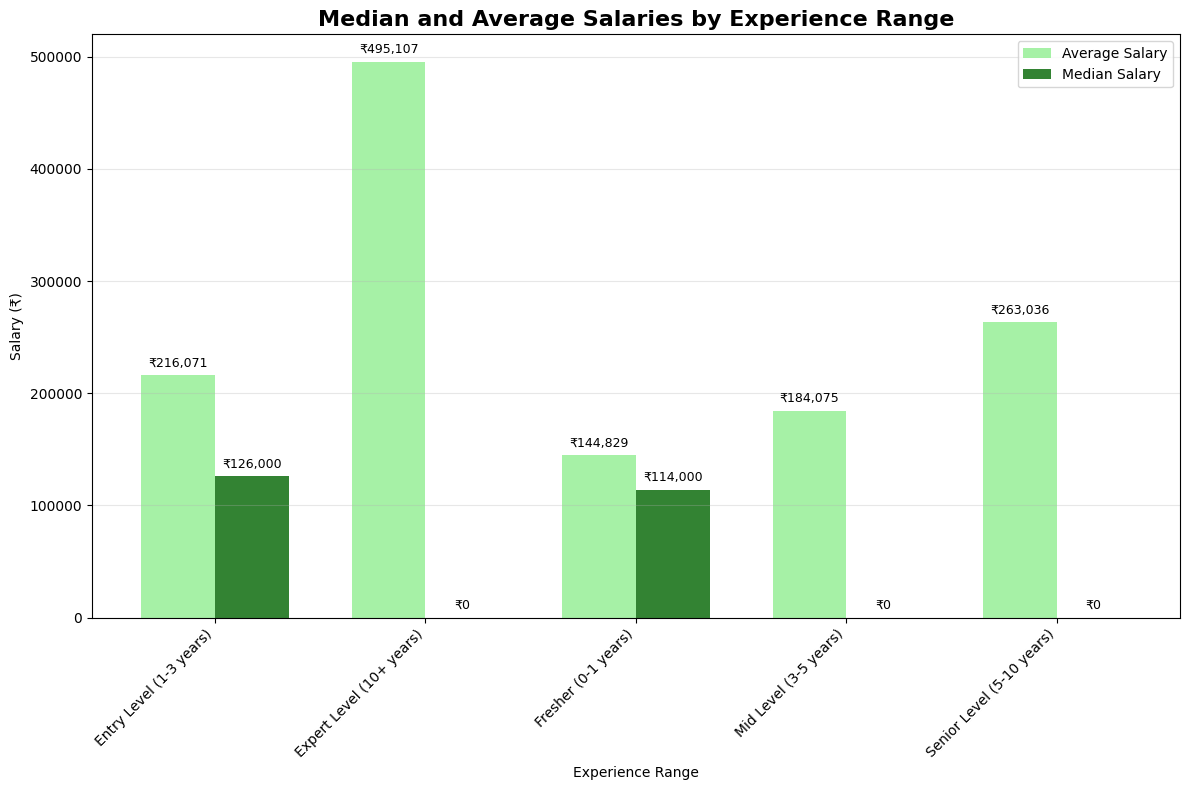

Insight: Experience directly correlates with salary - senior roles command highest pay


In [36]:
# Chart 4: Median and Average Salaries by Experience Range
plt.figure(figsize=(12, 8))

exp_salary = df.groupby('experienceCategory')['avgSalary'].agg(['mean', 'median']).round(0)
exp_salary = exp_salary.reset_index()

x = np.arange(len(exp_salary))
width = 0.35

plt.bar(x - width/2, exp_salary['mean'], width, label='Average Salary', alpha=0.8, color='lightgreen')
plt.bar(x + width/2, exp_salary['median'], width, label='Median Salary', alpha=0.8, color='darkgreen')

plt.xlabel('Experience Range')
plt.ylabel('Salary (₹)')
plt.title('Median and Average Salaries by Experience Range', fontsize=16, fontweight='bold')
plt.xticks(x, exp_salary['experienceCategory'], rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', alpha=0.3)

# Add value labels
for i, (mean_val, median_val) in enumerate(zip(exp_salary['mean'], exp_salary['median'])):
    plt.text(i - width/2, mean_val + 5000, f'₹{mean_val:,.0f}', ha='center', va='bottom', fontsize=9)
    plt.text(i + width/2, median_val + 5000, f'₹{median_val:,.0f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print("Insight: Experience directly correlates with salary - senior roles command highest pay")

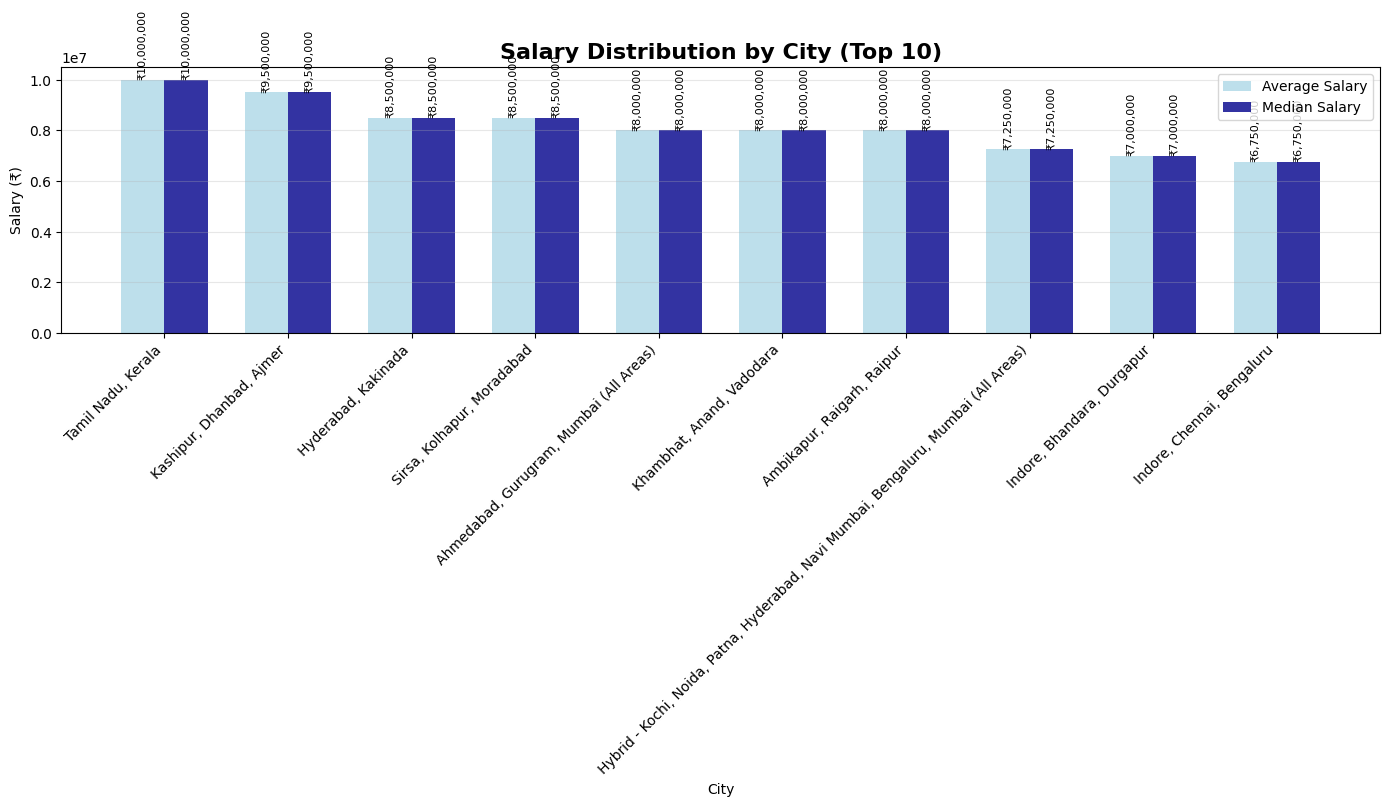

Insight: Highest average salaries are in Tamil Nadu, Kerala at ₹{city_salary['mean'].iloc[0]:,.0f}


In [37]:
# Chart 5: Salary Distribution by City
plt.figure(figsize=(14, 8))

city_salary = df.groupby('location')['avgSalary'].describe().round(0)
city_salary = city_salary.sort_values('mean', ascending=False).head(10)
city_salary = city_salary.reset_index()

x = np.arange(len(city_salary))
width = 0.35

plt.bar(x - width/2, city_salary['mean'], width, label='Average Salary', alpha=0.8, color='lightblue')
plt.bar(x + width/2, city_salary['50%'], width, label='Median Salary', alpha=0.8, color='darkblue')

plt.xlabel('City')
plt.ylabel('Salary (₹)')
plt.title('Salary Distribution by City (Top 10)', fontsize=16, fontweight='bold')
plt.xticks(x, city_salary['location'], rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', alpha=0.3)

# Add value labels
for i, (mean_val, median_val) in enumerate(zip(city_salary['mean'], city_salary['50%'])):
    plt.text(i - width/2, mean_val + 5000, f'₹{mean_val:,.0f}', ha='center', va='bottom', fontsize=8, rotation=90)
    plt.text(i + width/2, median_val + 5000, f'₹{median_val:,.0f}', ha='center', va='bottom', fontsize=8, rotation=90)

plt.tight_layout()
plt.show()

print("Insight: Highest average salaries are in", city_salary['location'].iloc[0], "at ₹{city_salary['mean'].iloc[0]:,.0f}")

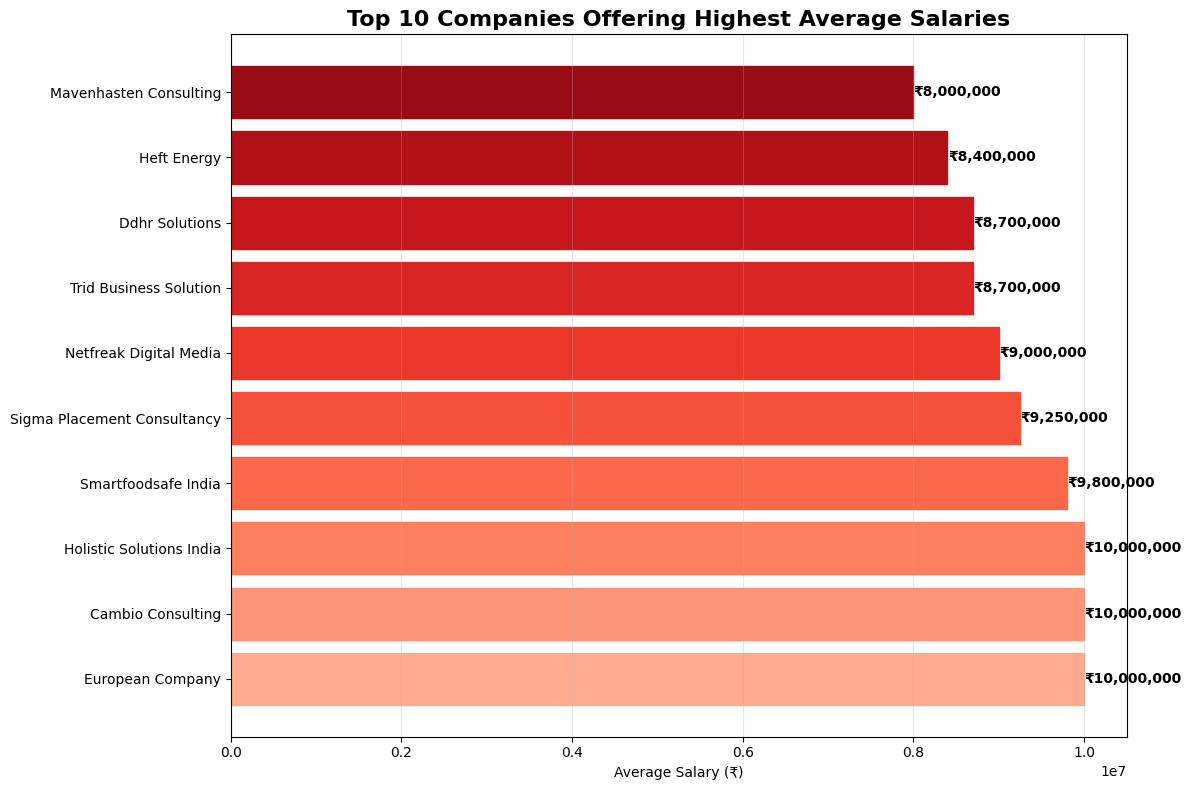

Insight: Highest paying company is European Company at ₹{company_salary.values[0]:,.0f} average salary


In [38]:
# Chart 6: Top 10 Companies Offering Highest Average Salaries
plt.figure(figsize=(12, 8))

company_salary = df.groupby('companyName')['avgSalary'].mean().round(0)
company_salary = company_salary.sort_values(ascending=False).head(10)

bars = plt.barh(range(len(company_salary)), company_salary.values)
plt.yticks(range(len(company_salary)), company_salary.index)
plt.xlabel('Average Salary (₹)')
plt.title('Top 10 Companies Offering Highest Average Salaries', fontsize=16, fontweight='bold')
plt.grid(axis='x', alpha=0.3)

# Color bars by value
colors = plt.cm.Reds(np.linspace(0.3, 0.9, len(company_salary)))
for bar, color in zip(bars, colors):
    bar.set_color(color)

# Add value labels
for i, v in enumerate(company_salary.values):
    plt.text(v + 5000, i, f'₹{v:,.0f}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("Insight: Highest paying company is", company_salary.index[0], "at ₹{company_salary.values[0]:,.0f} average salary")

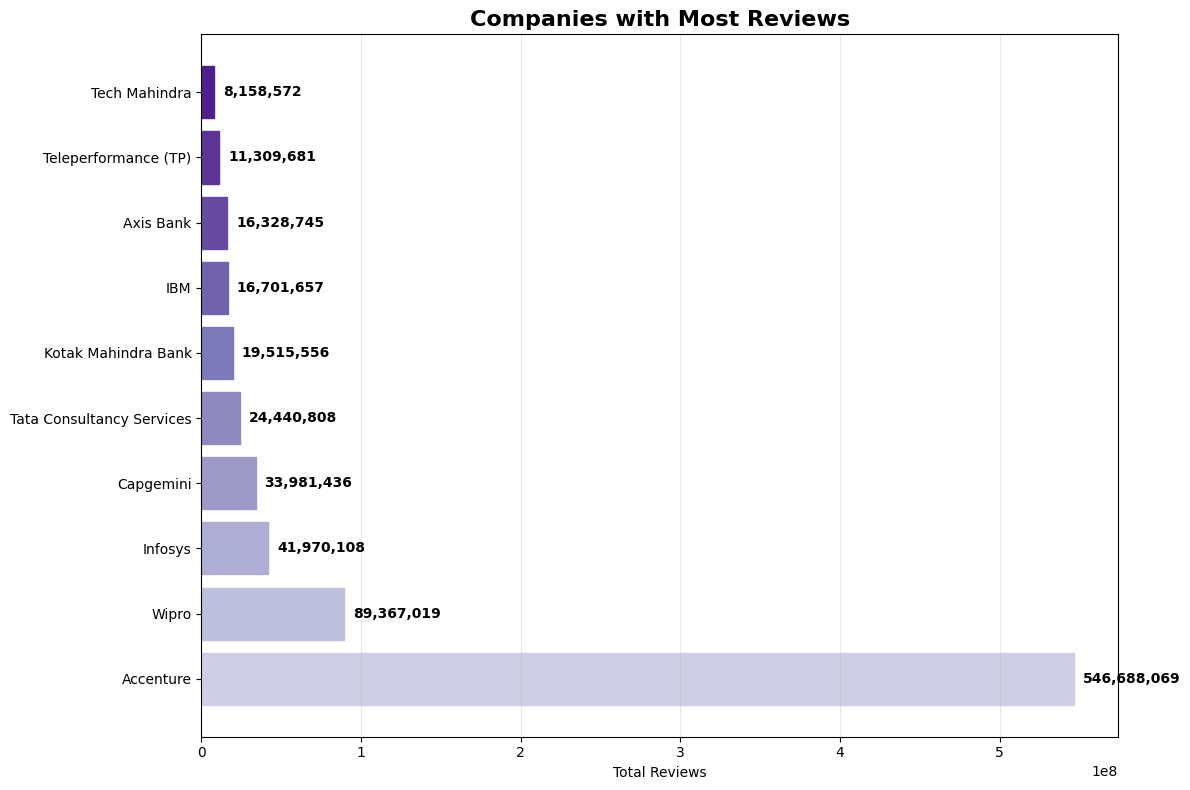

Insight: Most reviewed company is Accenture with 546688069 reviews


In [39]:
# Chart 7: Companies with Most Reviews
plt.figure(figsize=(12, 8))

review_counts = df.groupby('companyName')['ReviewsCount'].sum()
review_counts = review_counts.sort_values(ascending=False).head(10)

bars = plt.barh(range(len(review_counts)), review_counts.values)
plt.yticks(range(len(review_counts)), review_counts.index)
plt.xlabel('Total Reviews')
plt.title('Companies with Most Reviews', fontsize=16, fontweight='bold')
plt.grid(axis='x', alpha=0.3)

# Color bars by value
colors = plt.cm.Purples(np.linspace(0.3, 0.9, len(review_counts)))
for bar, color in zip(bars, colors):
    bar.set_color(color)

# Add value labels
for i, v in enumerate(review_counts.values):
    plt.text(v + max(review_counts.values) * 0.01, i, f'{v:,}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("Insight: Most reviewed company is", review_counts.index[0], "with", review_counts.values[0], "reviews")

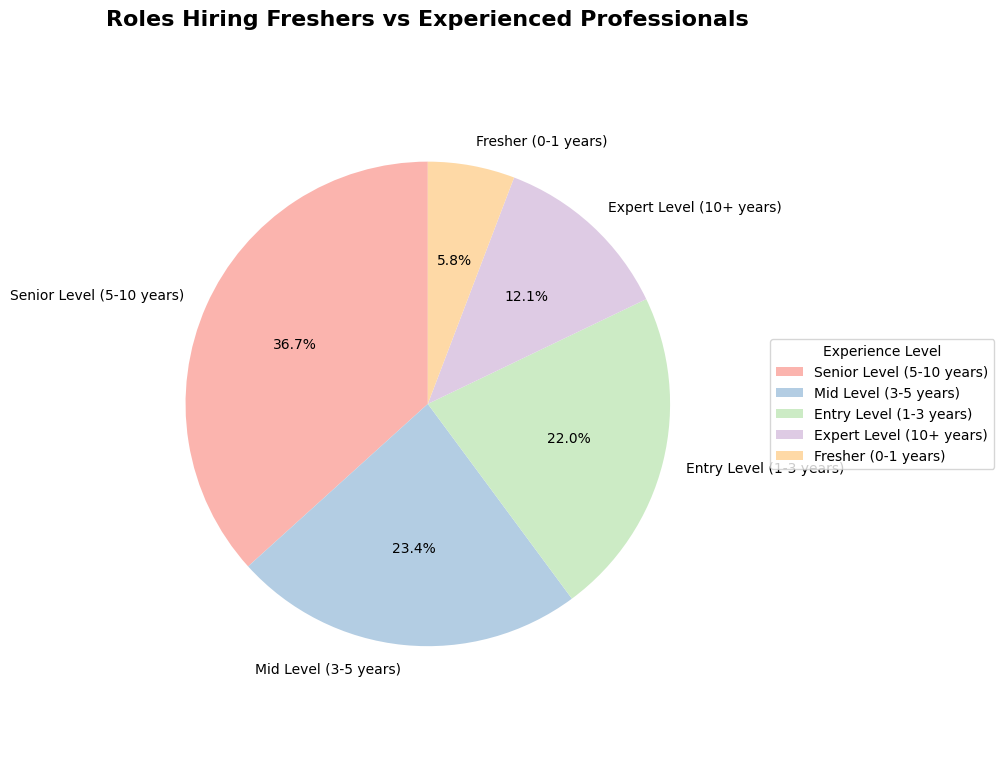

Insight: 5.8% of job openings (5,662 positions) are suitable for freshers


In [40]:
# Chart 8: Roles Hiring Freshers vs Experienced Professionals
plt.figure(figsize=(10, 8))

fresher_exp = df['experienceCategory'].value_counts()

plt.pie(fresher_exp.values, labels=fresher_exp.index, autopct='%1.1f%%', 
        startangle=90, colors=plt.cm.Pastel1.colors)
plt.title('Roles Hiring Freshers vs Experienced Professionals', fontsize=16, fontweight='bold')
plt.axis('equal')

# Add legend
plt.legend(fresher_exp.index, title="Experience Level", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()

fresher_count = len(df[df['experienceCategory'] == 'Fresher (0-1 years)'])
fresher_pct = (fresher_count / len(df)) * 100

print("Insight: {:.1f}% of job openings ({:,} positions) are suitable for freshers".format(fresher_pct, fresher_count))

In [41]:
print("\n" + "=" * 60)
print("🎯 LINKEDIN INDIA JOBS MARKET INSIGHTS SUMMARY")
print("=" * 60)

# Calculate key insights
total_jobs = len(df)
avg_salary = df['avgSalary'].mean()
top_city = df['location'].value_counts().index[0]
top_role = df['title'].value_counts().index[0]
fresher_jobs = len(df[df['experienceCategory'] == 'Fresher (0-1 years)'])
fresher_pct = (fresher_jobs / total_jobs) * 100

print(f"📊 Dataset Overview:")
print(f"   • {total_jobs:,} job positions analyzed")
print(f"   • Average salary: ₹{avg_salary:,.0f}")
print(f"   • Average experience required: {df['avgExperience'].mean():.1f} years")

print(f"\n🏙️ Geographic Insights:")
print(f"   • Top city: {top_city} ({df['location'].value_counts().iloc[0]} jobs)")
print(f"   • Cities with highest salaries: {df.groupby('location')['avgSalary'].mean().sort_values(ascending=False).head(3).index.tolist()}")

print(f"\n💼 Job Market Trends:")
print(f"   • Most common role: {top_role}")
print(f"   • Fresher-friendly jobs: {fresher_pct:.1f}% ({fresher_jobs:,} positions)")
print(f"   • Highest paying company: {df.groupby('companyName')['avgSalary'].mean().sort_values(ascending=False).index[0]}")

print(f"\n💰 Salary Insights:")
salary_by_exp = df.groupby('experienceCategory')['avgSalary'].mean().round(0)
print(f"   • Fresher salary: ₹{salary_by_exp.get('Fresher (0-1 years)', 0):,.0f}")
print(f"   • Senior level salary: ₹{salary_by_exp.get('Senior Level (5-10 years)', 0):,.0f}")
print(f"   • Expert level salary: ₹{salary_by_exp.get('Expert Level (10+ years)', 0):,.0f}")

print(f"\n🎓 Opportunities for Freshers:")
fresher_roles = df[df['experienceCategory'] == 'Fresher (0-1 years)']['title'].value_counts().head(3)
print("   Top fresher roles:")
for role, count in fresher_roles.items():
    print(f"   • {role}: {count} openings")

print("\n" + "=" * 60)


🎯 LINKEDIN INDIA JOBS MARKET INSIGHTS SUMMARY
📊 Dataset Overview:
   • 97,679 job positions analyzed
   • Average salary: ₹255,399
   • Average experience required: 5.8 years

🏙️ Geographic Insights:
   • Top city: Bengaluru (16783 jobs)
   • Cities with highest salaries: ['Tamil Nadu, Kerala', 'Kashipur, Dhanbad, Ajmer', 'Hyderabad, Kakinada']

💼 Job Market Trends:
   • Most common role: Application Developer
   • Fresher-friendly jobs: 5.8% (5,662 positions)
   • Highest paying company: European Company

💰 Salary Insights:
   • Fresher salary: ₹144,829
   • Senior level salary: ₹263,036
   • Expert level salary: ₹495,107

🎓 Opportunities for Freshers:
   Top fresher roles:
   • Trust & Safety New Associate: 348 openings
   • Sales Executive: 87 openings
   • Business Development Executive: 77 openings



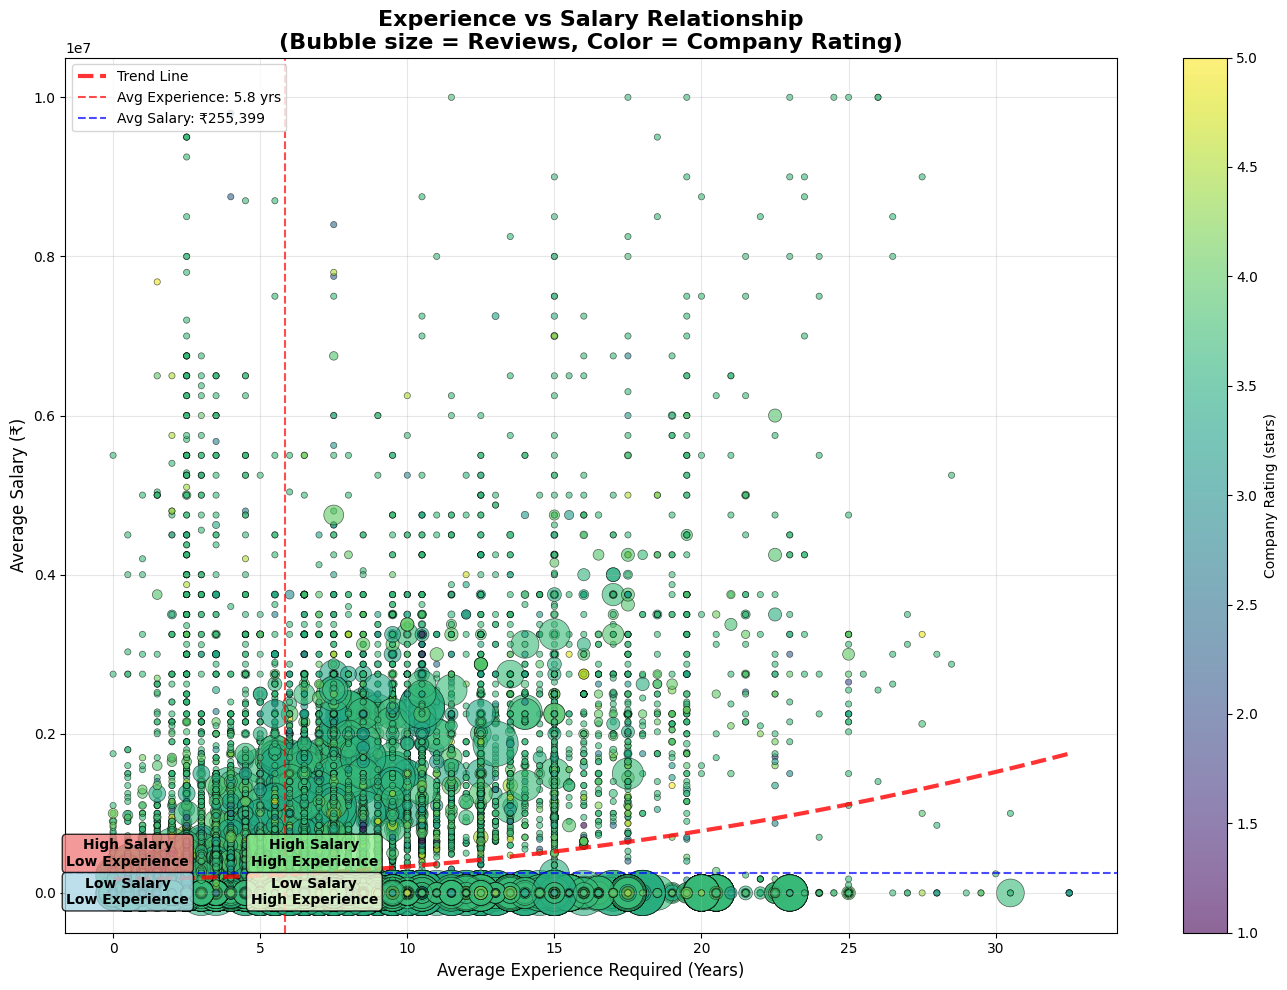

📈 Experience vs Salary Correlation Analysis:
   • Correlation coefficient: 0.164
   • Weak relationship

🎯 Quadrant Distribution:
   • High Salary, Low Experience (Q1): 17669 jobs (18.1%)
   • High Salary, High Experience (Q2): 9160 jobs (9.4%)
   • Low Salary, Low Experience (Q3): 39730 jobs (40.7%)
   • Low Salary, High Experience (Q4): 31120 jobs (31.9%)

💎 High-Pay Entry Jobs (≤2 yrs exp, ≥₹255,399):
   • Desktop Support Engineer-Jaipu... at 3i Infotech...: ₹300,000
   • Partnership and Outreach Assoc... at Rits Capital...: ₹337,500
   • Business Associate... at Dracarys Incorporati...: ₹300,000


In [45]:
# Chart 9: Experience vs Salary Relationship with Rating Insights
plt.figure(figsize=(14, 10))

# Create scatter plot
scatter = plt.scatter(df['avgExperience'], df['avgSalary'], 
                     c=df['AggregateRating'], s=df['ReviewsCount']/100 + 20,
                     alpha=0.6, cmap='viridis', edgecolors='black', linewidth=0.5)

# Add trend line
z = np.polyfit(df['avgExperience'], df['avgSalary'], 2)
p = np.polyfit(df['avgExperience'], df['avgSalary'], 2)
trend_x = np.linspace(df['avgExperience'].min(), df['avgExperience'].max(), 100)
trend_y = np.polyval(p, trend_x)
plt.plot(trend_x, trend_y, 'r--', linewidth=3, alpha=0.8, label='Trend Line')

# Customize the plot
plt.xlabel('Average Experience Required (Years)', fontsize=12)
plt.ylabel('Average Salary (₹)', fontsize=12)
plt.title('Experience vs Salary Relationship\n(Bubble size = Reviews, Color = Company Rating)', 
          fontsize=16, fontweight='bold')

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Company Rating (stars)', fontsize=10)

# Add grid
plt.grid(True, alpha=0.3)

# Add reference lines for insights
avg_exp = df['avgExperience'].mean()
avg_salary = df['avgSalary'].mean()
plt.axvline(x=avg_exp, color='red', linestyle='--', alpha=0.7, label=f'Avg Experience: {avg_exp:.1f} yrs')
plt.axhline(y=avg_salary, color='blue', linestyle='--', alpha=0.7, label=f'Avg Salary: ₹{avg_salary:,.0f}')

# Add quadrant labels
plt.text(0.5, avg_salary + 50000, 'High Salary\nLow Experience', 
         ha='center', va='bottom', fontsize=10, fontweight='bold', 
         bbox=dict(boxstyle="round,pad=0.3", facecolor='lightcoral', alpha=0.8))
plt.text(avg_exp + 1, avg_salary + 50000, 'High Salary\nHigh Experience', 
         ha='center', va='bottom', fontsize=10, fontweight='bold',
         bbox=dict(boxstyle="round,pad=0.3", facecolor='lightgreen', alpha=0.8))
plt.text(0.5, avg_salary - 50000, 'Low Salary\nLow Experience', 
         ha='center', va='top', fontsize=10, fontweight='bold',
         bbox=dict(boxstyle="round,pad=0.3", facecolor='lightblue', alpha=0.8))
plt.text(avg_exp + 1, avg_salary - 50000, 'Low Salary\nHigh Experience', 
         ha='center', va='top', fontsize=10, fontweight='bold',
         bbox=dict(boxstyle="round,pad=0.3", facecolor='lightyellow', alpha=0.8))

plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Calculate correlation and insights
correlation = df['avgExperience'].corr(df['avgSalary'])
print("📈 Experience vs Salary Correlation Analysis:")
print(f"   • Correlation coefficient: {correlation:.3f}")
print(f"   • {'Strong' if abs(correlation) > 0.7 else 'Moderate' if abs(correlation) > 0.5 else 'Weak'} relationship")

# Quadrant analysis
q1_count = len(df[(df['avgExperience'] <= avg_exp) & (df['avgSalary'] >= avg_salary)])
q2_count = len(df[(df['avgExperience'] > avg_exp) & (df['avgSalary'] >= avg_salary)])
q3_count = len(df[(df['avgExperience'] <= avg_exp) & (df['avgSalary'] < avg_salary)])
q4_count = len(df[(df['avgExperience'] > avg_exp) & (df['avgSalary'] < avg_salary)])

print(f"\n🎯 Quadrant Distribution:")
print(f"   • High Salary, Low Experience (Q1): {q1_count} jobs ({q1_count/len(df)*100:.1f}%)")
print(f"   • High Salary, High Experience (Q2): {q2_count} jobs ({q2_count/len(df)*100:.1f}%)")
print(f"   • Low Salary, Low Experience (Q3): {q3_count} jobs ({q3_count/len(df)*100:.1f}%)")
print(f"   • Low Salary, High Experience (Q4): {q4_count} jobs ({q4_count/len(df)*100:.1f}%)")

# Top opportunities
high_pay_low_exp = df[(df['avgExperience'] <= 2) & (df['avgSalary'] >= avg_salary)].head(3)
if len(high_pay_low_exp) > 0:
    print(f"\n💎 High-Pay Entry Jobs (≤2 yrs exp, ≥₹{avg_salary:,.0f}):")
    for _, job in high_pay_low_exp.iterrows():
        print(f"   • {job['title'][:30]}... at {job['companyName'][:20]}...: ₹{job['avgSalary']:,.0f}")

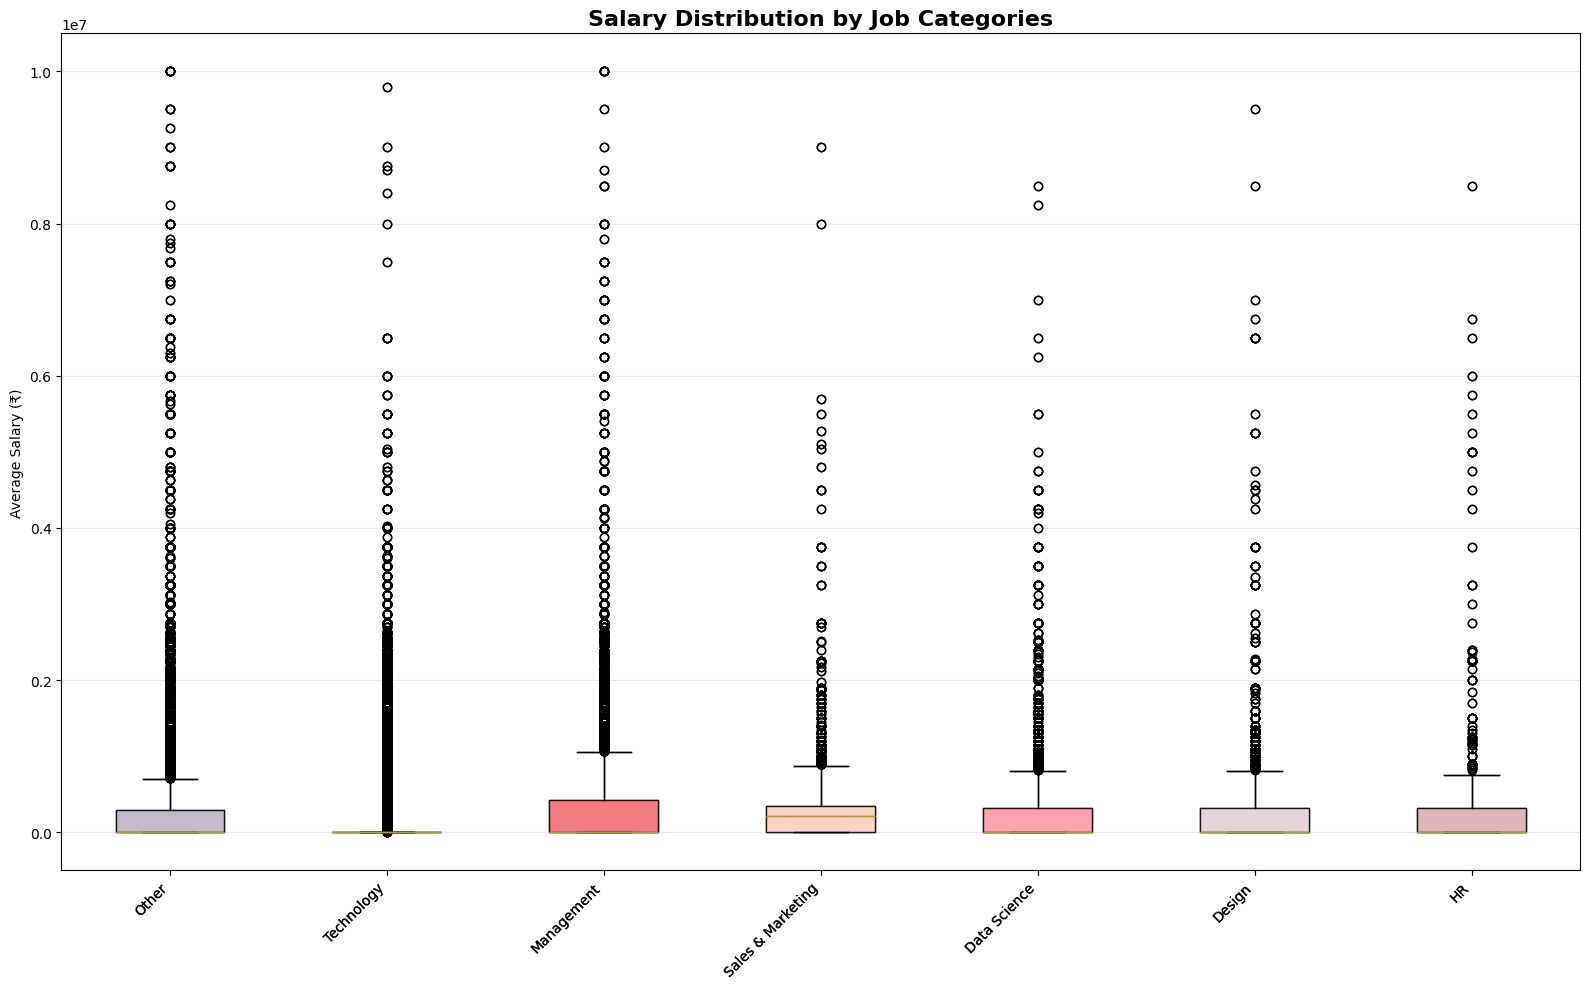

📊 Job Category Salary Insights:
   • Other: 34434 jobs, Avg: ₹237,990, Median: ₹0
   • Technology: 27278 jobs, Avg: ₹221,082, Median: ₹0
   • Management: 21876 jobs, Avg: ₹330,459, Median: ₹0
   • Sales & Marketing: 6340 jobs, Avg: ₹235,225, Median: ₹210,000
   • Data Science: 3716 jobs, Avg: ₹268,843, Median: ₹0
   • Design: 3123 jobs, Avg: ₹238,930, Median: ₹0
   • HR: 912 jobs, Avg: ₹280,503, Median: ₹0

💰 Top 3 Highest Paying Categories:
   • Management: ₹330,459
   • HR: ₹280,503
   • Data Science: ₹268,843


In [46]:
# Alternative Chart 9: Salary Distribution by Job Categories
plt.figure(figsize=(16, 10))

# Create job categories based on titles
def categorize_job_title(title):
    title = str(title).lower()
    if any(word in title for word in ['software', 'developer', 'engineer', 'programmer', 'analyst']):
        return 'Technology'
    elif any(word in title for word in ['manager', 'lead', 'director', 'head']):
        return 'Management'
    elif any(word in title for word in ['data scientist', 'machine learning', 'ai', 'ml']):
        return 'Data Science'
    elif any(word in title for word in ['designer', 'ui', 'ux', 'graphic']):
        return 'Design'
    elif any(word in title for word in ['sales', 'marketing', 'business development']):
        return 'Sales & Marketing'
    elif any(word in title for word in ['hr', 'human resources', 'recruitment']):
        return 'HR'
    else:
        return 'Other'

df['jobCategory'] = df['title'].apply(categorize_job_title)

# Create box plot
categories = df['jobCategory'].value_counts().head(8).index
category_data = [df[df['jobCategory'] == cat]['avgSalary'].values for cat in categories]

plt.boxplot(category_data, labels=categories, patch_artist=True)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Average Salary (₹)')
plt.title('Salary Distribution by Job Categories', fontsize=16, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

# Color the boxes
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow', 'lightpink', 'lightcyan', 'lightgray', 'lavender']
for patch, color in zip(plt.boxplot(category_data, labels=categories, patch_artist=True)['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

plt.tight_layout()
plt.show()

# Category insights
print("📊 Job Category Salary Insights:")
for cat in categories:
    cat_data = df[df['jobCategory'] == cat]['avgSalary']
    count = len(cat_data)
    avg_sal = cat_data.mean()
    med_sal = cat_data.median()
    print(f"   • {cat}: {count} jobs, Avg: ₹{avg_sal:,.0f}, Median: ₹{med_sal:,.0f}")

# Highest paying categories
top_categories = df.groupby('jobCategory')['avgSalary'].mean().sort_values(ascending=False).head(3)
print(f"\n💰 Top 3 Highest Paying Categories:")
for cat, salary in top_categories.items():
    print(f"   • {cat}: ₹{salary:,.0f}")

2025-10-27 20:47:02.672 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-27 20:47:02.673 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-27 20:47:02.897 
  command:

    streamlit run /opt/anaconda3/envs/datascience/lib/python3.12/site-packages/ipykernel_launcher.py [ARGUMENTS]
2025-10-27 20:47:02.897 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-27 20:47:02.897 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-27 20:47:02.898 No runtime found, using MemoryCacheStorageManager
2025-10-27 20:47:02.901 No runtime found, using MemoryCacheStorageManager
2025-10-27 20:47:02.901 Thread 'MainThread': missing ScriptRunContex

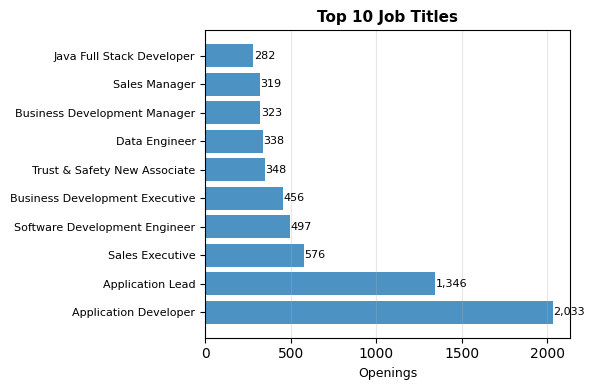

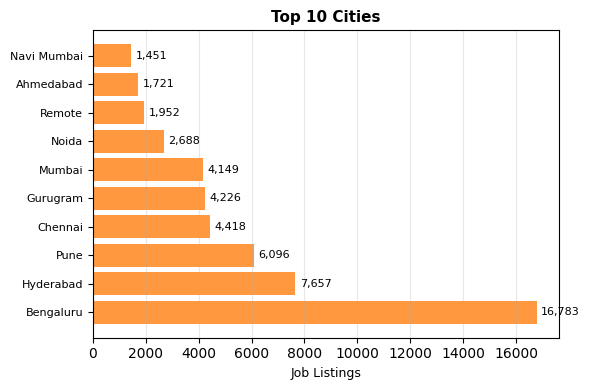

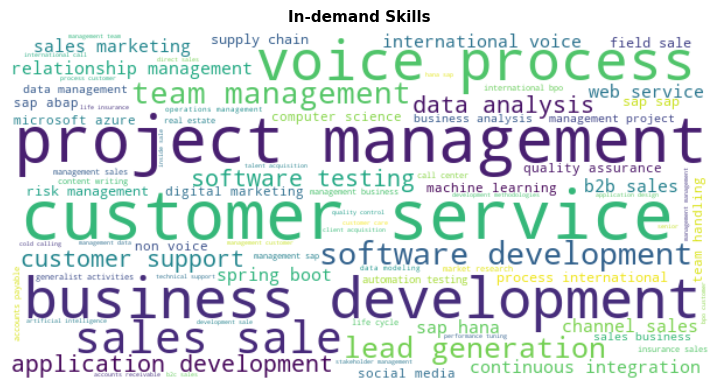

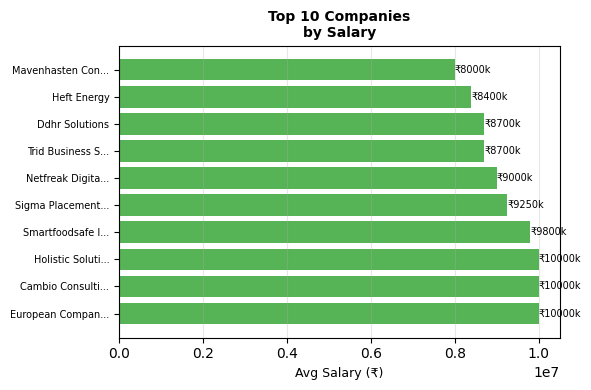

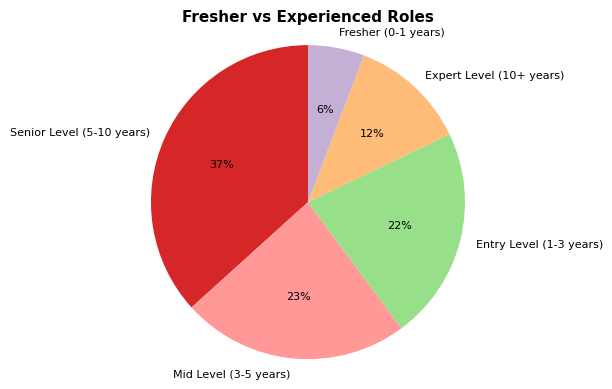

In [47]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set page config for better layout
st.set_page_config(
    page_title="LinkedIn Jobs Dashboard",
    page_icon="💼",
    layout="wide",
    initial_sidebar_state="collapsed"
)

# Custom CSS for compact layout
st.markdown("""
<style>
    .main-header {
        font-size: 2rem;
        font-weight: bold;
        color: #1f77b4;
        text-align: center;
        margin-bottom: 1rem;
    }
    .chart-container {
        background: white;
        padding: 0.5rem;
        border-radius: 8px;
        box-shadow: 0 1px 3px rgba(0, 0, 0, 0.1);
        margin-bottom: 0.5rem;
    }
    .metric-container {
        background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
        color: white;
        padding: 0.75rem;
        border-radius: 8px;
        text-align: center;
        margin-bottom: 0.5rem;
    }
    .metric-value {
        font-size: 1.4rem;
        font-weight: bold;
        margin-bottom: 0.25rem;
    }
    .metric-label {
        font-size: 0.85rem;
        opacity: 0.9;
    }
    [data-testid="stSidebar"] {
        display: none;
    }
</style>
""", unsafe_allow_html=True)

# Load and prepare data
@st.cache_data
def load_data():
    try:
        df = pd.read_excel('job_data_fully_cleaned.xlsx')
    except:
        df = pd.read_excel('job_data.xlsx')
        # Basic cleaning
        df = df.dropna(subset=['title', 'location'])
        df['minimumSalary'] = df['minimumSalary'].fillna(df['minimumSalary'].median())
        df['maximumSalary'] = df['maximumSalary'].fillna(df['maximumSalary'].median())
        df['minimumExperience'] = df['minimumExperience'].fillna(df['minimumExperience'].median())
        df['maximumExperience'] = df['maximumExperience'].fillna(df['maximumExperience'].median())
    
    df['avgSalary'] = (df['minimumSalary'] + df['maximumSalary']) / 2
    df['avgExperience'] = (df['minimumExperience'] + df['maximumExperience']) / 2
    
    def categorize_experience(exp):
        if exp <= 1: return 'Fresher (0-1 years)'
        elif exp <= 3: return 'Entry Level (1-3 years)'
        elif exp <= 5: return 'Mid Level (3-5 years)'
        elif exp <= 10: return 'Senior Level (5-10 years)'
        else: return 'Expert Level (10+ years)'
    
    df['experienceCategory'] = df['avgExperience'].apply(categorize_experience)
    return df

def create_wordcloud(text_data):
    """Create word cloud from text data"""
    if text_data.empty or len(text_data) == 0:
        return None
    
    all_text = ' '.join(str(text) for text in text_data if pd.notna(text))
    words = re.findall(r'\b\w+\b', all_text.lower())
    stop_words = {'and', 'or', 'the', 'a', 'an', 'in', 'on', 'at', 'to', 'for', 'of', 'with', 'by', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'do', 'does', 'did', 'will', 'would', 'could', 'should', 'may', 'might', 'must', 'can', 'shall', 'skills', 'skill', 'experience', 'required', 'years', 'year', 'work'}
    words = [word for word in words if word not in stop_words and len(word) > 2]
    
    if not words:
        return None
    
    wordcloud = WordCloud(width=600, height=300, background_color='white', 
                         max_words=80, colormap='viridis').generate(' '.join(words))
    return wordcloud

def create_chart1(df):
    """Top 10 Job Titles by Openings"""
    fig, ax = plt.subplots(figsize=(6, 4))
    title_counts = df['title'].value_counts().head(10)
    
    bars = ax.barh(range(len(title_counts)), title_counts.values, color='#1f77b4', alpha=0.8)
    ax.set_yticks(range(len(title_counts)))
    ax.set_yticklabels(title_counts.index, fontsize=8)
    ax.set_xlabel('Openings', fontsize=9)
    ax.set_title('Top 10 Job Titles', fontsize=11, fontweight='bold')
    ax.grid(axis='x', alpha=0.3)
    
    for i, v in enumerate(title_counts.values):
        ax.text(v + 2, i, f'{v:,}', va='center', fontsize=8)
    
    plt.tight_layout()
    return fig

def create_chart2(df):
    """Top 10 Cities with Most Job Listings"""
    fig, ax = plt.subplots(figsize=(6, 4))
    city_counts = df['location'].value_counts().head(10)
    
    bars = ax.barh(range(len(city_counts)), city_counts.values, color='#ff7f0e', alpha=0.8)
    ax.set_yticks(range(len(city_counts)))
    ax.set_yticklabels(city_counts.index, fontsize=8)
    ax.set_xlabel('Job Listings', fontsize=9)
    ax.set_title('Top 10 Cities', fontsize=11, fontweight='bold')
    ax.grid(axis='x', alpha=0.3)
    
    for i, v in enumerate(city_counts.values):
        ax.text(v + max(city_counts.values)*0.01, i, f'{v:,}', va='center', fontsize=8)
    
    plt.tight_layout()
    return fig

def create_chart3(df):
    """In-demand Skills Word Cloud"""
    fig, ax = plt.subplots(figsize=(10, 4))
    skills_text = df['tagsAndSkills'].dropna()
    wordcloud = create_wordcloud(skills_text)
    
    if wordcloud:
        ax.imshow(wordcloud, interpolation='bilinear')
        ax.axis('off')
        ax.set_title('In-demand Skills', fontsize=11, fontweight='bold')
    else:
        ax.text(0.5, 0.5, 'No skills data available', 
                ha='center', va='center', fontsize=12, transform=ax.transAxes)
        ax.axis('off')
    
    plt.tight_layout()
    return fig

def create_chart6(df):
    """Top 10 Companies by Average Salary"""
    fig, ax = plt.subplots(figsize=(6, 4))
    company_salary = df.groupby('companyName')['avgSalary'].mean().round(0)
    company_salary = company_salary.sort_values(ascending=False).head(10)
    
    bars = ax.barh(range(len(company_salary)), company_salary.values, color='#2ca02c', alpha=0.8)
    ax.set_yticks(range(len(company_salary)))
    ax.set_yticklabels([name[:15] + '...' if len(name) > 15 else name for name in company_salary.index], fontsize=7)
    ax.set_xlabel('Avg Salary (₹)', fontsize=9)
    ax.set_title('Top 10 Companies\nby Salary', fontsize=10, fontweight='bold')
    ax.grid(axis='x', alpha=0.3)
    
    for i, v in enumerate(company_salary.values):
        ax.text(v + 1000, i, f'₹{v/1000:.0f}k', va='center', fontsize=7)
    
    plt.tight_layout()
    return fig

def create_chart8(df):
    """Fresher vs Experienced Roles"""
    fig, ax = plt.subplots(figsize=(6, 4))
    fresher_exp = df['experienceCategory'].value_counts()
    
    wedges, texts, autotexts = ax.pie(fresher_exp.values, labels=fresher_exp.index, 
                                      autopct='%1.0f%%', startangle=90, 
                                      colors=['#d62728', '#ff9896', '#98df8a', '#ffbb78', '#c5b0d5'])
    ax.set_title('Fresher vs Experienced Roles', fontsize=11, fontweight='bold')
    ax.axis('equal')
    
    # Make labels smaller
    for text in texts:
        text.set_fontsize(8)
    for autotext in autotexts:
        autotext.set_fontsize(8)
    
    plt.tight_layout()
    return fig

# Main app
def main():
    # Load data
    df = load_data()
    
    # Header with KPIs
    st.markdown('<h1 class="main-header">💼 LinkedIn Jobs Dashboard</h1>', unsafe_allow_html=True)
    
    # KPIs in a compact row
    col1, col2, col3, col4, col5 = st.columns(5)
    
    with col1:
        st.markdown(f"""
        <div class="metric-container">
            <div class="metric-value">{len(df):,}</div>
            <div class="metric-label">Total Jobs</div>
        </div>
        """, unsafe_allow_html=True)
    
    with col2:
        avg_salary = df['avgSalary'].mean()
        st.markdown(f"""
        <div class="metric-container">
            <div class="metric-value">₹{avg_salary/1000:.0f}k</div>
            <div class="metric-label">Avg Salary</div>
        </div>
        """, unsafe_allow_html=True)
    
    with col3:
        avg_exp = df['avgExperience'].mean()
        st.markdown(f"""
        <div class="metric-container">
            <div class="metric-value">{avg_exp:.1f}</div>
            <div class="metric-label">Avg Exp (yrs)</div>
        </div>
        """, unsafe_allow_html=True)
    
    with col4:
        top_city = df['location'].value_counts().index[0]
        st.markdown(f"""
        <div class="metric-container">
            <div class="metric-value">{top_city}</div>
            <div class="metric-label">Top City</div>
        </div>
        """, unsafe_allow_html=True)
    
    with col5:
        fresher_pct = (len(df[df['experienceCategory'] == 'Fresher (0-1 years)']) / len(df)) * 100
        st.markdown(f"""
        <div class="metric-container">
            <div class="metric-value">{fresher_pct:.0f}%</div>
            <div class="metric-label">Fresher Jobs</div>
        </div>
        """, unsafe_allow_html=True)
    
    # Charts in compact layout
    # Row 1: Chart 1 and Chart 2
    col1, col2 = st.columns(2)
    
    with col1:
        st.markdown('<div class="chart-container">', unsafe_allow_html=True)
        fig1 = create_chart1(df)
        st.pyplot(fig1, use_container_width=True)
        st.markdown('</div>', unsafe_allow_html=True)
    
    with col2:
        st.markdown('<div class="chart-container">', unsafe_allow_html=True)
        fig2 = create_chart2(df)
        st.pyplot(fig2, use_container_width=True)
        st.markdown('</div>', unsafe_allow_html=True)
    
    # Row 2: Chart 3 (full width)
    st.markdown('<div class="chart-container">', unsafe_allow_html=True)
    fig3 = create_chart3(df)
    st.pyplot(fig3, use_container_width=True)
    st.markdown('</div>', unsafe_allow_html=True)
    
    # Row 3: Chart 6 and Chart 8
    col3, col4 = st.columns(2)
    
    with col3:
        st.markdown('<div class="chart-container">', unsafe_allow_html=True)
        fig6 = create_chart6(df)
        st.pyplot(fig6, use_container_width=True)
        st.markdown('</div>', unsafe_allow_html=True)
    
    with col4:
        st.markdown('<div class="chart-container">', unsafe_allow_html=True)
        fig8 = create_chart8(df)
        st.pyplot(fig8, use_container_width=True)
        st.markdown('</div>', unsafe_allow_html=True)
    
    # Footer
    st.markdown("---")
    st.caption("*Dashboard created with Streamlit • Data: LinkedIn Jobs India*")

if __name__ == "__main__":
    main()

In [1]:
df = pd.read_excel("job_data_fully_cleaned.xlsx")
df.to_parquet("job_data_fully_cleaned.parquet", index=False)

NameError: name 'pd' is not defined